In [106]:
library(ggplot2)

options(repr.plot.height=6,repr.plot.width=8 , repr.plot.res = 200)
##options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [107]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [108]:
airbnb[1:6,]

Zipcode Neighbourhood.Cleansed Property.Type Room.Type       Accommodates
1 28004   Universidad            Apartment     Private room    2           
2 28004   Universidad            Apartment     Entire home/apt 6           
3 28004   Universidad            Apartment     Entire home/apt 3           
4 28004   Universidad            Loft          Entire home/apt 3           
5 28015   Universidad            Apartment     Entire home/apt 5           
6 28004   Universidad            Apartment     Entire home/apt 2           
  Bathrooms Bedrooms Beds Bed.Type
1 2         1        1    Real Bed
2 1         3        5    Real Bed
3 1         2        2    Real Bed
4 2         1        1    Real Bed
5 1         1        1    Real Bed
6 1         0        1    Real Bed
  Amenities                                                                                                                                                                                                                                                                                                                                                       
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  Square.Feet Price Review.Scores.Rating
1  NA         35     NA                 
2  NA         92     96                 
3  NA         55     91                 
4  NA         60    100                 
5 538         75     90                 
6  NA         55     95

Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [109]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")


In [110]:
names(airbnb)<-newnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [111]:
airbnb$MetrosCuadrados <- 0.092903 * airbnb$PiesCuadrados
colnames(airbnb)
head(airbnb)

[1] "CodigoPostal"    "Barrio"          "TipoPropiedad"   "TipoAlquiler"   
 [5] "MaxOcupantes"    "NumBanyos"       "NumDormitorios"  "NumCamas"       
 [9] "TipoCama"        "Comodidades"     "PiesCuadrados"   "Precio"         
[13] "Puntuacion"      "MetrosCuadrados"

CodigoPostal Barrio      TipoPropiedad TipoAlquiler    MaxOcupantes NumBanyos
1 28004        Universidad Apartment     Private room    2            2        
2 28004        Universidad Apartment     Entire home/apt 6            1        
3 28004        Universidad Apartment     Entire home/apt 3            1        
4 28004        Universidad Loft          Entire home/apt 3            2        
5 28015        Universidad Apartment     Entire home/apt 5            1        
6 28004        Universidad Apartment     Entire home/apt 2            1        
  NumDormitorios NumCamas TipoCama
1 1              1        Real Bed
2 3              5        Real Bed
3 2              2        Real Bed
4 1              1        Real Bed
5 1              1        Real Bed
6 0              1        Real Bed
  Comodidades                                                                                                                                                                                                                                                                                                                                                     
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  PiesCuadrados Precio Puntuacion MetrosCuadrados
1  NA           35      NA              NA       
2  NA           92      96              NA       
3  NA           55      91              NA       
4  NA           60     100              NA       
5 538           75      90        49.98181       
6  NA           55      95              NA

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [112]:
#Comprobamos los errores que efectivamente se describen en el enunciado
summary(airbnb$CodigoPostal)

-        20013        20126         2015        25008 
         439            1            1            1            1            1 
       27004        27013           28        28001       280013        28002 
           1            1            1          231            1          170 
28002\n28002        28003        28004        28005        28006        28007 
           1          185         1794         1194          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1019 
       28014        28015        28016        28017        28018        28019 
         630          600           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029        28030        28031 
          93          122          263          110           73           27 
       28032        28033        28034        28035        28036        28037 
          33           89           45           59           67           65 
       28038        28039         2804        28040        28041        28042 
          77          160            1           16           63           90 
       28043        28044        28045        28046        28047        28048 
         103           19          495           32           67            1 
       28049         2805        28050        28051 28051\n28051        28052 
           3            1           58           16            1            1 
       28053        28054        28055        28056        28058        28060 
          85           12           12            1            1            1 
       28094        28105         2815        28850 Madrid 28004 
           1            1            1            1            1

In [113]:
# Corregimos  '', '-' y '28 y todos los que no empiecen por 28

airbnb$CodigoPostal[airbnb$CodigoPostal=='-' | airbnb$CodigoPostal=='28' | substr(airbnb$CodigoPostal,0,2) != '28'] <- NA 

In [114]:
# Corregimos las entradas repetidas (28002, 28004 y 28051)

airbnb$CodigoPostal[grepl("28002",airbnb$CodigoPostal,fixed=TRUE)] <- '28002'
airbnb$CodigoPostal[grepl("28004",airbnb$CodigoPostal,fixed=TRUE)] <- '28004'
airbnb$CodigoPostal[grepl("28051",airbnb$CodigoPostal,fixed=TRUE)] <- '28051'

In [115]:
# Corregimos el código 2804 debería ser 28004, 2805 debería ser 28005 y 2815 junto con 2815 debería ser 28015
# Además en el summary he observado el 280013 que entiendo que es 28013, se corrige también

airbnb$CodigoPostal[airbnb$CodigoPostal=='2804'] <- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2805'] <- '28005'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2815'] <- '28015'
airbnb$CodigoPostal[airbnb$CodigoPostal=='280013'] <- '28013'

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [116]:
# Comprobamos que ya no hay códigos postales erróneos, para ello primero eliminamos los factores que 
# ya no estén contemplados en la muestra
airbnb$CodigoPostal <-droplevels(airbnb$CodigoPostal)
summary(airbnb$CodigoPostal)


28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  1795  1195   218   206   338   216   384   250  2060  1020 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   601    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850  NA's 
   85    12    12     1     1     1     1     1     1   448

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [117]:
cpMasRepe <- names(sort(summary(airbnb$CodigoPostal), decreasing=T)[1:5])
paste(" Los códigos postales con más entradas son: ",paste(cpMasRepe,collapse=", "))
#En la siguiente tabla se puede observar los códigos postales junto con el número de entradas
sort(table(airbnb$CodigoPostal), decreasing = TRUE)[1:5]

[1] " Los códigos postales con más entradas son:  28012, 28004, 28005, 28013, 28014"


28012 28004 28005 28013 28014 
 2060  1795  1195  1020   630 

In [118]:
cpMenosRepe <- names(sort(summary(airbnb$CodigoPostal[airbnb$CodigoPostal!=0]), decreasing=F)[1:5])
paste(" Los códigos postales con más entradas son: ",paste(cpMenosRepe,collapse=", "))
#En la siguiente tabla se puede observar los códigos postales junto con el número de entradas
sort(table(airbnb$CodigoPostal), decreasing = FALSE)[1:5]

[1] " Los códigos postales con más entradas son:  28048, 28052, 28056, 28058, 28060"


28048 28052 28056 28058 28060 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [119]:
barrios28012 <-unique(na.omit(airbnb$Barrio[airbnb$CodigoPostal =='28012']))
paste(" Los barrios que hay en el código postal 28012 son: ",paste(barrios28012 ,collapse=", "))


[1] " Los barrios que hay en el código postal 28012 son:  Sol, Acacias, Palos de Moguer, Embajadores, Cortes, Palacio, Universidad, Delicias, Arapiles, Atocha, Goya"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [120]:
airbnb28012 <- airbnb[airbnb$CodigoPostal=='28012',]
airbnb28012$Barrio <-droplevels(airbnb28012$Barrio)
#En la siguiente tabla se puede observar las entradas que hay en cada uno de esos barrios para el código postal 28012
table(airbnb28012$Barrio)


        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [121]:
numeroBarrio <-length(table(airbnb$Barrio))
paste(" El número de barrios en el dataset es: ",numeroBarrio)
barriosMadrid <- unique(na.omit(airbnb$Barrio))
paste(" Los barrios del dataset son:",paste(barriosMadrid ,collapse=", "))


[1] " El número de barrios en el dataset es:  125"

[1] " Los barrios del dataset son: Universidad, Sol, Imperial, Acacias, Chopera, Delicias, Palos de Moguer, Embajadores, Cortes, Atocha, Pacífico, Adelfas, Estrella, Ibiza, Jerónimos, Niño Jesús, Palacio, Justicia, Recoletos, Goya, Fuente del Berro, Arapiles, Trafalgar, Almagro, Guindalera, Lista, Castellana, El Viso, Prosperidad, Valverde, Casa de Campo, El Goloso, Numancia, Cármenes, Puerta del Angel, Lucero, Aluche, San Isidro, Campamento, Comillas, Opañel, Vista Alegre, Ciudad Jardín, Hispanoamérica, Nueva España, Castilla, Bellas Vistas, Cuatro Caminos, Castillejos, Vallehermoso, Almenara, Valdeacederas, Berruguete, Gaztambide, Rios Rosas, Peñagrande, Argüelles, Puerta Bonita, Buenavista, Abrantes, Orcasur, San Fermín, Almendrales, Pradolongo, Portazgo, Entrevías, San Diego, Palomeras Bajas, Fontarrón, Vinateros, Ventas, Pueblo Nuevo, Quintana, Concepción, San Juan Bautista, Costillares, Piovera, Canillas, Pinar del Rey, Apostol Santiago, San Andrés, Valdefuentes, Butarque, Los Angeles, Casco Histórico de Vicálvaro, Simancas, Rejas, Salvador, Casco Histórico de Barajas, Pilar, La Paz, Mirasierra, Ciudad Universitaria, Moscardó, Palomeras Sureste, Marroquina, Media Legua, Los Rosales, Casco Histórico de Vallecas, Timón, Corralejos, Cuatro Vientos, Colina, San Cristobal, Alameda de Osuna, Aeropuerto, Palomas, Zofío, Aguilas, Legazpi, Fuentelareina, Aravaca, Ambroz, Canillejas, Valdezarza, Amposta, San Pascual, Santa Eugenia, Arcos, Rosas, Valdemarín, El Plantío, Hellín, Pavones, Orcasitas"

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [122]:
paste("Los 5 barrios con más entradas son: ",paste(names(sort(table(airbnb$Barrio), decreasing = TRUE)[1:5]),collapse=", "))
sort(table(airbnb$Barrio), decreasing = TRUE)[1:5]

[1] "Los 5 barrios con más entradas son:  Embajadores, Universidad, Palacio, Sol, Justicia"


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [123]:
numeroTiposAlquileres <-length(unique(na.omit(airbnb$TipoAlquiler)))
paste("Tipos de alquileres diferentes: ",numeroTiposAlquileres)

[1] "Tipos de alquileres diferentes:  3"

In [19]:
tiposAlquileres <- names(table(airbnb$TipoAlquiler))
paste("Los diferentes tipos de alquileres son: ", paste(tiposAlquileres ,collapse=", "))


[1] "Los diferentes tipos de alquileres son:  Entire home/apt, Private room, Shared room"

In [124]:
# La siguiente tabla muestra el número de entradas por tipo de alquiler
table(airbnb$TipoAlquiler)


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


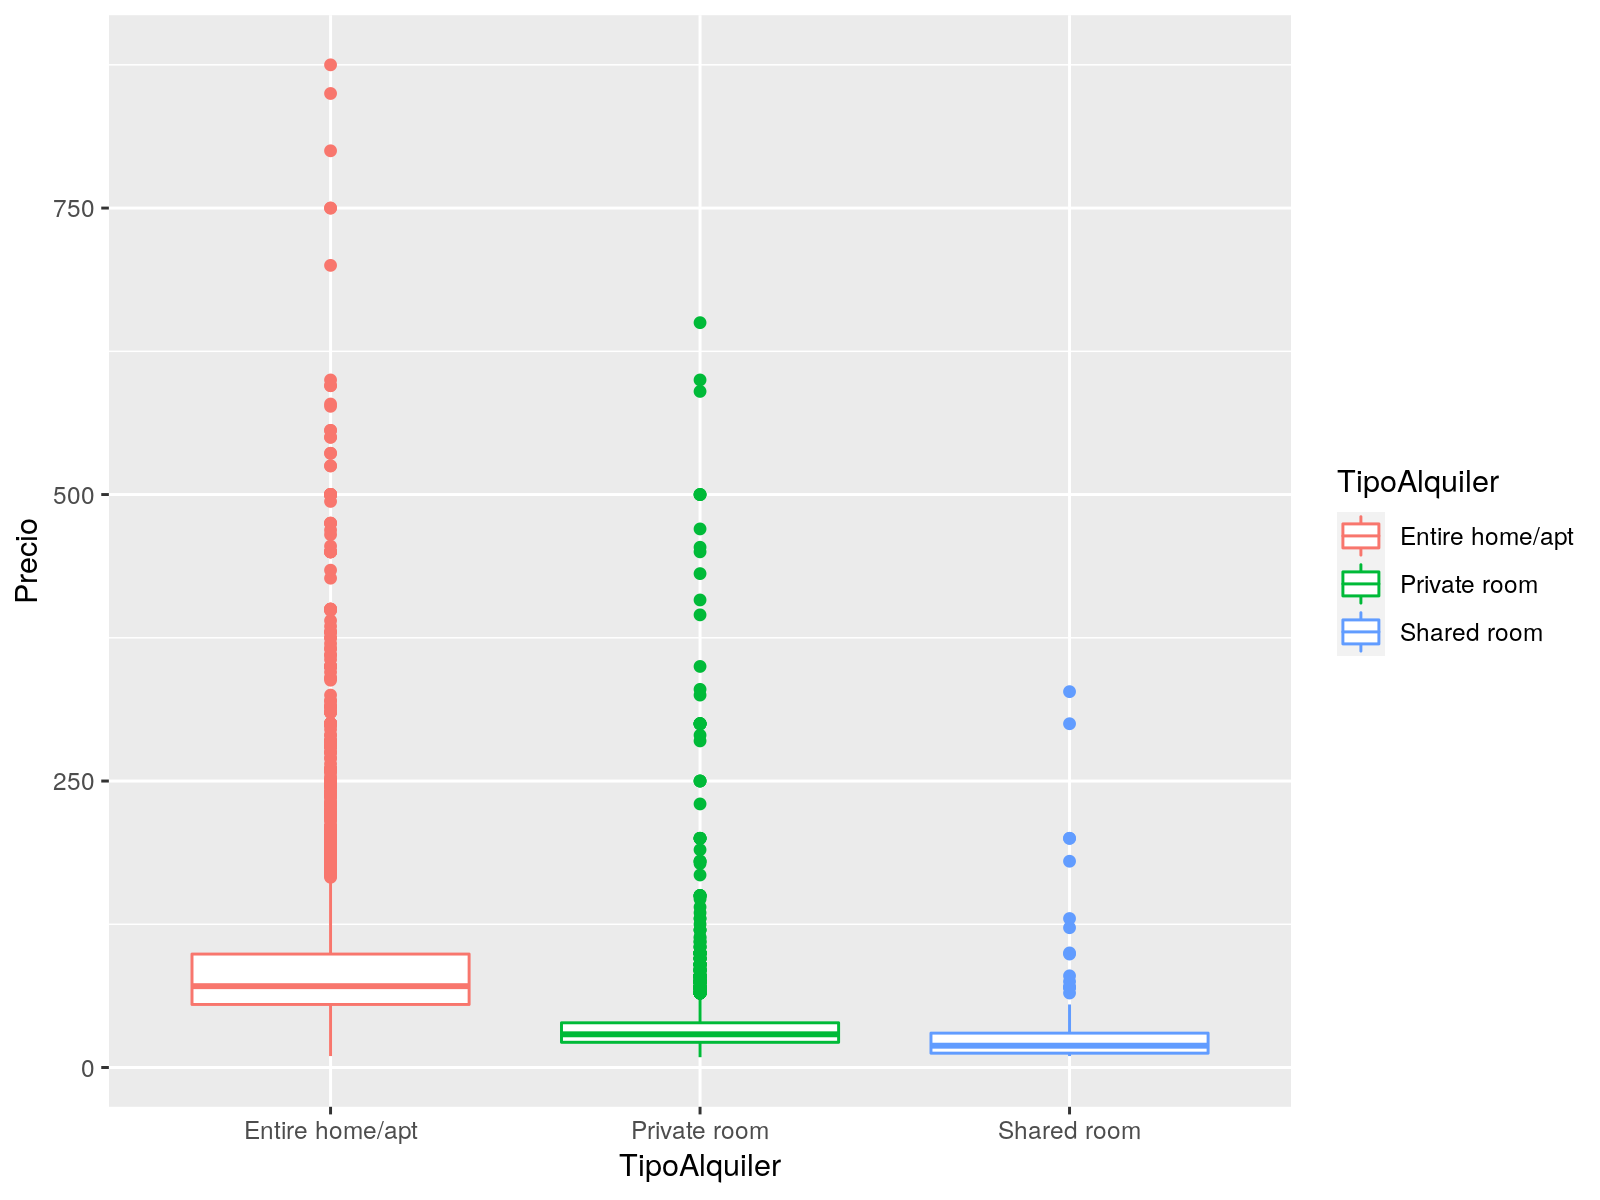

In [125]:
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+geom_boxplot()+
 scale_color_discrete(name="TipoAlquiler")+xlab('TipoAlquiler')+ylab('Precio')

In [126]:
# resumen estadístico
summary(airbnb$Precio[airbnb$TipoAlquiler=='Entire home/apt'],)
summary(airbnb$Precio[airbnb$TipoAlquiler=='Private room'],)
summary(airbnb$Precio[airbnb$TipoAlquiler=='Shared room'],)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   10.0    55.0    71.0    87.3    99.0   875.0       7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   22.00   29.00   34.26   39.00  650.00       2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   12.50   19.00   29.85   30.00  328.00 

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [127]:
library(dplyr)
library(tidyr)

# En primer lugar para saber el tipo de test a realizar debemos comprobar si la distribución para cada tipo
# de alquiler sigue una distribución normal.
# El test a realizar podría ser un test de shafiro, sin embargo, no permite realizarlo con más de 5000 observaciones
# Tal y como hemos visto en los puntos previos Entire home/apt tiene 7903 observaciones y Private room 5113
# Voy a realizar por tanto el test de Kolmogorov-Smirnov

 
for (v in levels(airbnb$TipoAlquiler)){
    X <- filter(airbnb,TipoAlquiler==v & !is.na(Precio)) %>% select(c(Precio))
    nx <-nrow(X)
    print(paste("Tipo:",v,"pvalue,",
                ks.test(airbnb$Precio[airbnb$TipoAlquiler==v],'pnorm',mean(X[1:nx,],na.rm = TRUE),var(X[1:nx,],na.rm = TRUE))$p.value))
}

print("Vemos que los p-value son 0, por lo que ninguna de estas distribuciones se parece a la normal distribución no se parece a una normal")
print("Rechazamos la hipótesis nula de normalidad")
# el test de Kolmogorov-Smirnov se queja de que hay datos duplicados, y es necesario darle la media y la varianza. 

Warning message in ks.test(airbnb$Precio[airbnb$TipoAlquiler == v], "pnorm", mean(X[1:nx, :
“ties should not be present for the Kolmogorov-Smirnov test”


[1] "Tipo: Entire home/apt pvalue, 0"


Warning message in ks.test(airbnb$Precio[airbnb$TipoAlquiler == v], "pnorm", mean(X[1:nx, :
“ties should not be present for the Kolmogorov-Smirnov test”


[1] "Tipo: Private room pvalue, 0"


Warning message in ks.test(airbnb$Precio[airbnb$TipoAlquiler == v], "pnorm", mean(X[1:nx, :
“ties should not be present for the Kolmogorov-Smirnov test”


[1] "Tipo: Shared room pvalue, 0"
[1] "Vemos que los p-value son 0, por lo que ninguna de estas distribuciones se parece a la normal distribución no se parece a una normal"
[1] "Rechazamos la hipótesis nula de normalidad"


In [128]:
# Como hemos observado que la distribución no parece que sea normal realizamos El test de Kruskal-Wallis 
df <- airbnb[c('Precio','TipoAlquiler')]
kruskal.test( Precio ~ TipoAlquiler, data=df)
print("El test encuentra diferencia significativa en al menos dos grupos. Ya que el p-value es 0")


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


[1] "El test encuentra diferencia significativa en al menos dos grupos. Ya que el p-value es 0"


In [25]:
# Concluimos que parece que existen diferencias en las medias por tipo de Alquiler, 
#y además que estas diferencias son significativas 

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [129]:
airbnb_entire <- subset(airbnb,airbnb$TipoAlquiler=='Entire home/apt')

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [131]:
paste("Los 5 barrios con más número de apartamentos enteros en alquiler son: ",paste(names(sort(table(airbnb_entire$Barrio), decreasing = TRUE)[1:5]),collapse=", "))

# El número de entradas por barrio es:
sort(table(airbnb_entire$Barrio), decreasing = TRUE)[1:5]

[1] "Los 5 barrios con más número de apartamentos enteros en alquiler son:  Embajadores, Universidad, Palacio, Sol, Cortes"


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [132]:
precioMedioBarrio <- aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE)

In [133]:
# La siguiente dataframe muestra los 5 barrios con mayor precio de alquiler para apartamentos entero,
# y su precio medio
precioMedioBarrio[order(precioMedioBarrio$Precio, decreasing = TRUE)[1:5],]

Barrio        Precio  
77 Palomas       309.7500
50 Fuentelareina 180.0000
93 Recoletos     161.9254
43 El Plantío    150.0000
30 Castellana    141.3889

¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [134]:
freqBarrio <- data.frame(with(airbnb_entire, table(Barrio)))
airbnb_entire_PrecioFreq <-merge (precioMedioBarrio,freqBarrio, by = "Barrio", all.x =TRUE)

In [135]:
# En la siguiente tabla podemos ver el precio medio y el número de entradas para los 5 barrios con mayor precio
# medio de apartamentos entero
airbnb_entire_PrecioFreq [order(airbnb_entire_PrecioFreq$Precio,decreasing = TRUE)[1:5],]

Barrio        Precio   Freq
77 Palomas       309.7500   4 
50 Fuentelareina 180.0000   2 
93 Recoletos     161.9254 135 
43 El Plantío    150.0000   1 
30 Castellana    141.3889  73

Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [136]:
# La siguiente dataframe muestra los 5 barrios con mayor precio medio de apartamentos entero, pero que tenga
# más de 100 entradas
airbnb_entire_PrecioFreq[order(airbnb_entire_PrecioFreq$Precio,decreasing = TRUE),]%>% filter(Freq>100)  %>% head(5)

Barrio    Precio    Freq
1 Recoletos 161.92537 135 
2 Goya      111.33803 142 
3 Sol       100.75036 701 
4 Trafalgar  98.57848 223 
5 Justicia   98.25468 534

Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

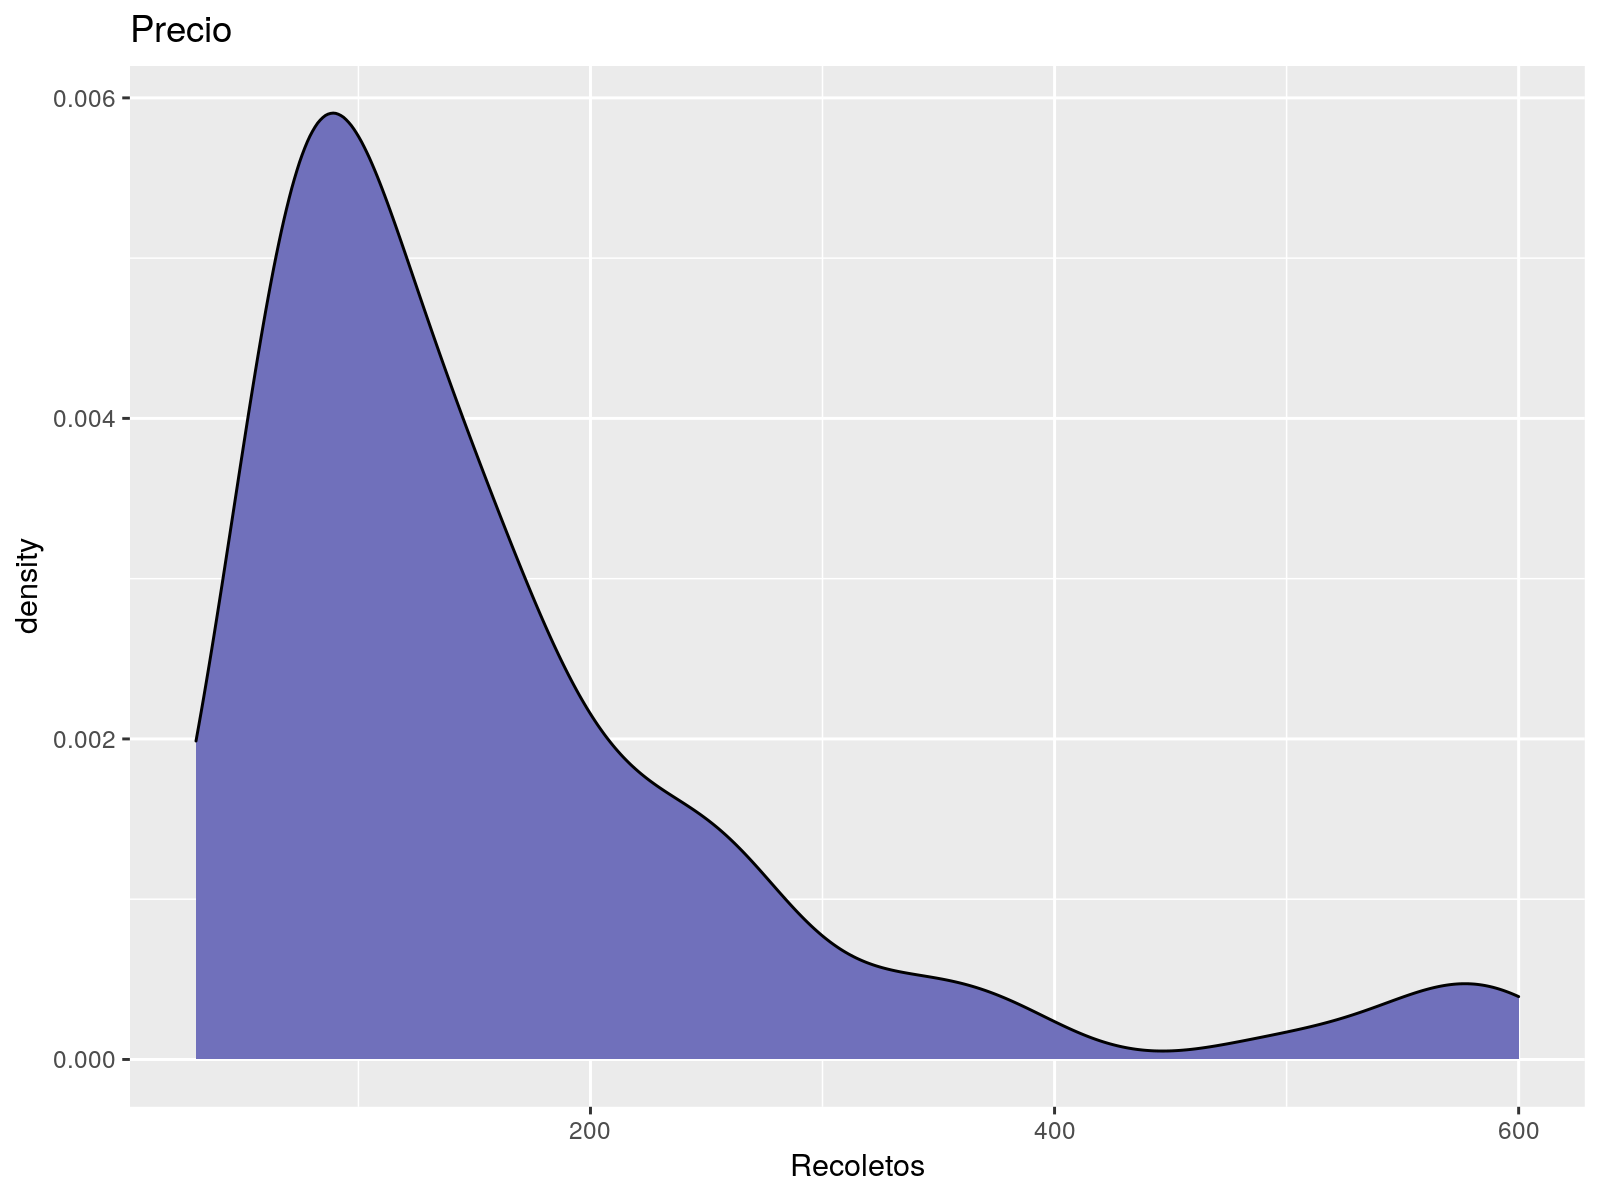

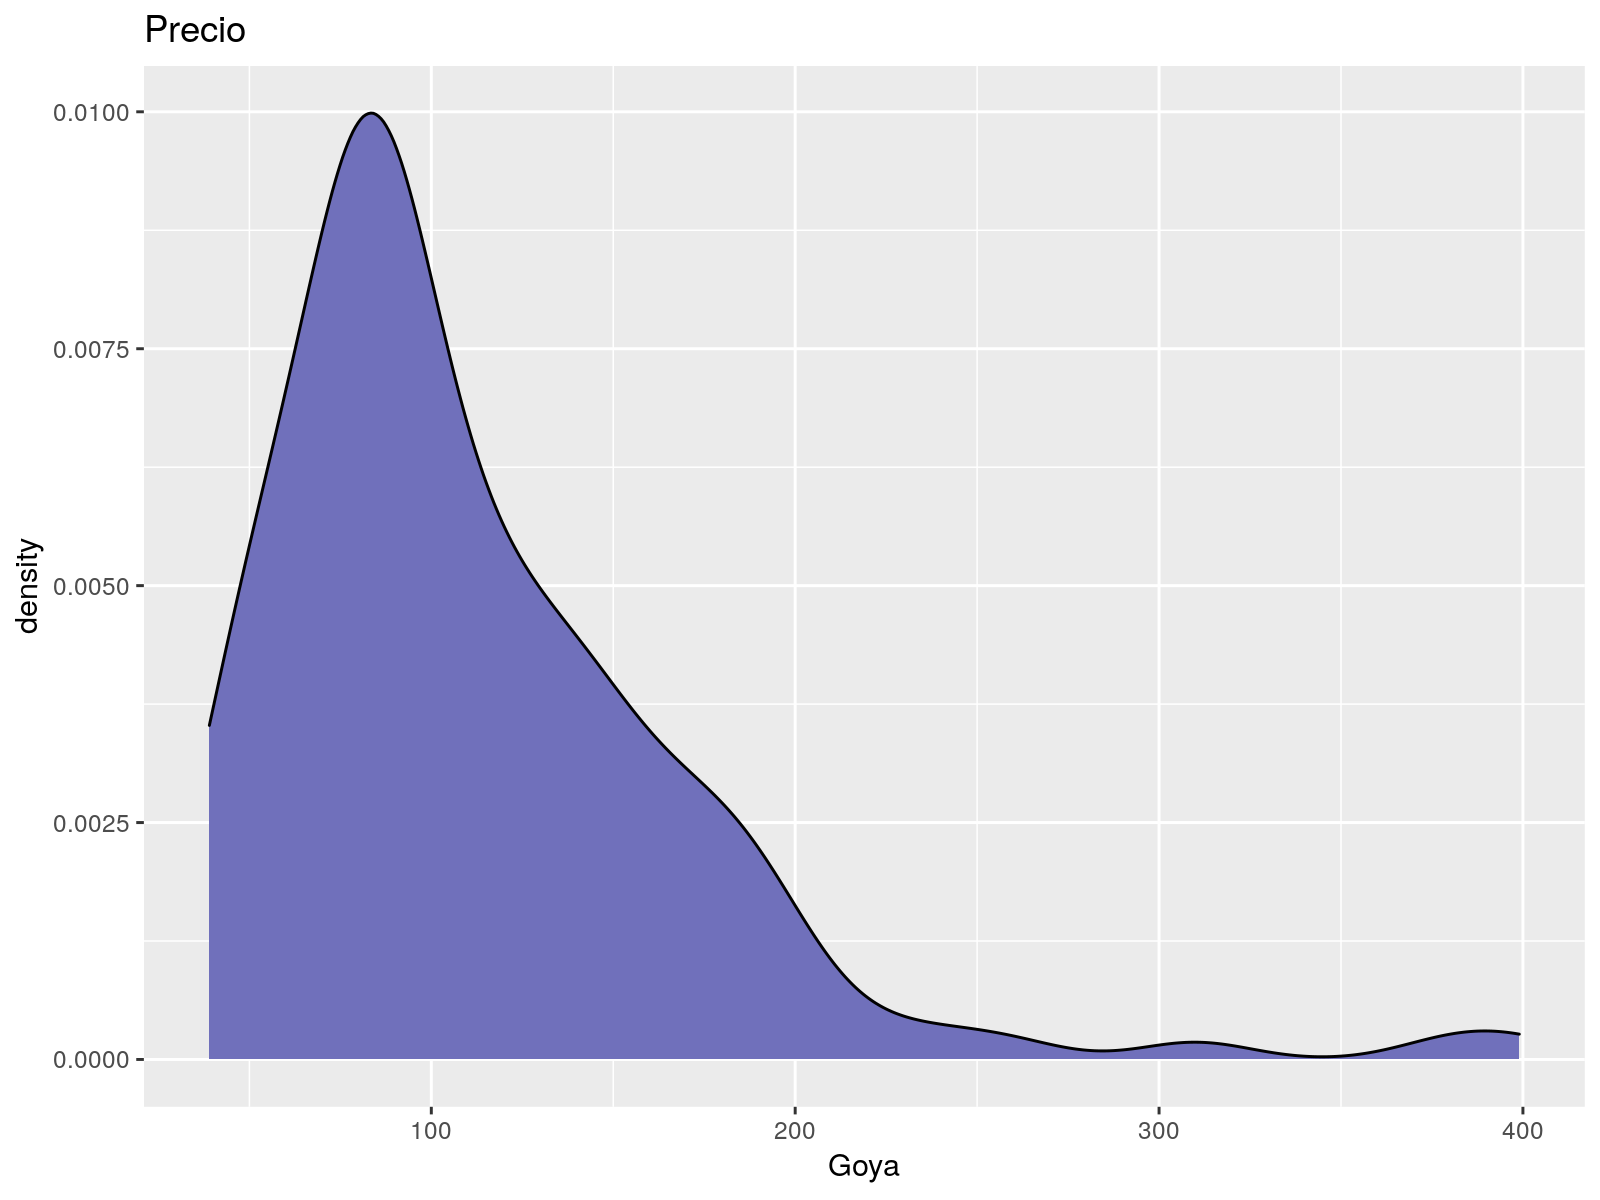

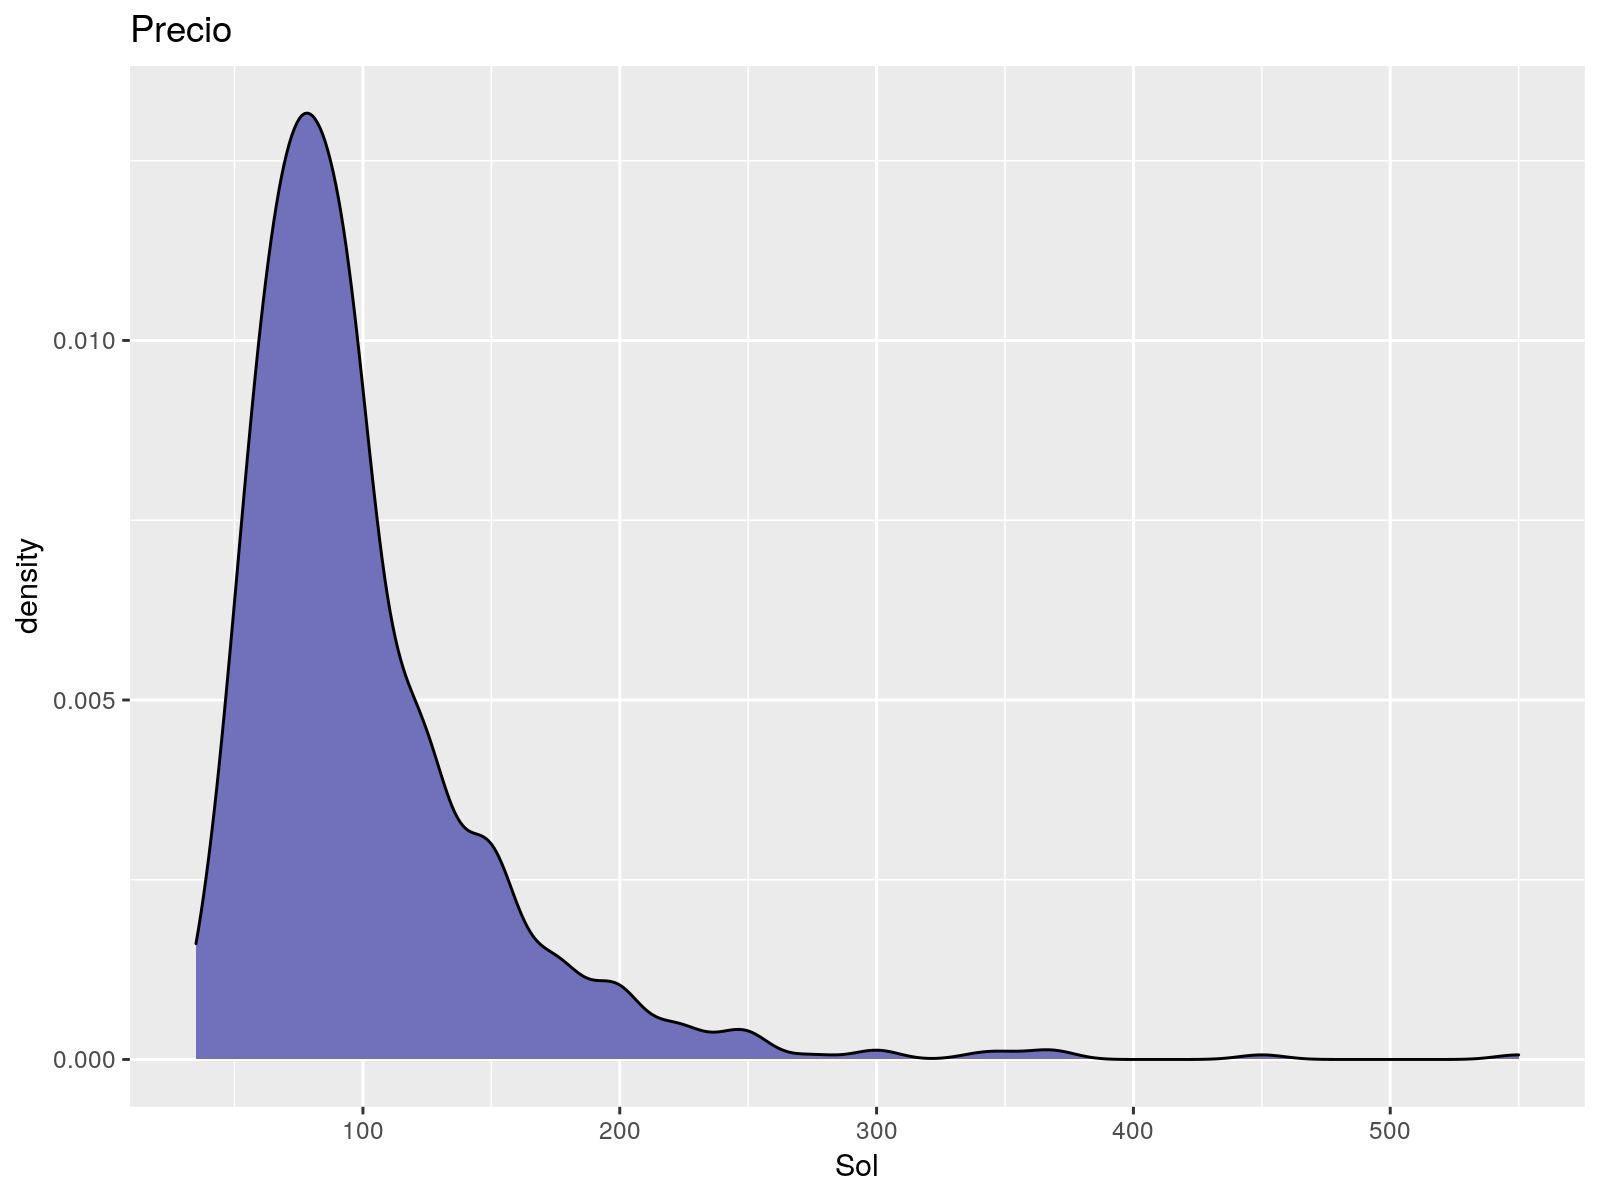

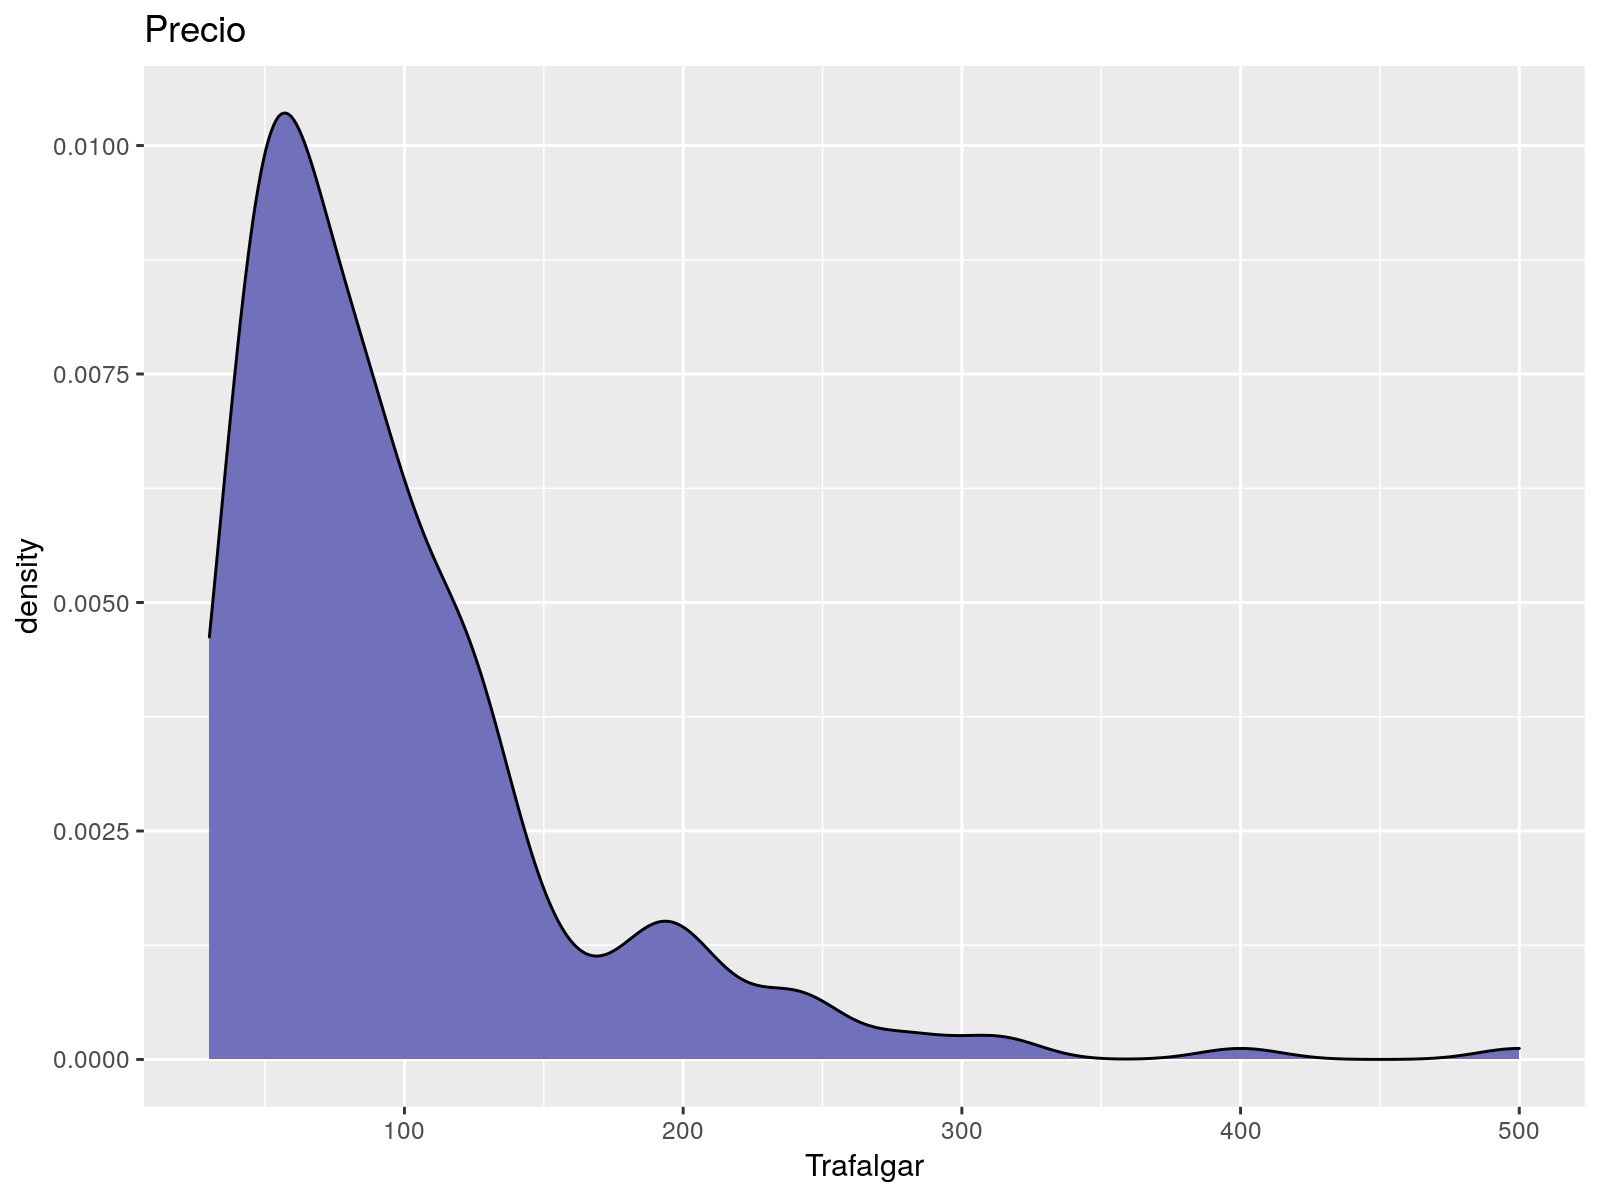

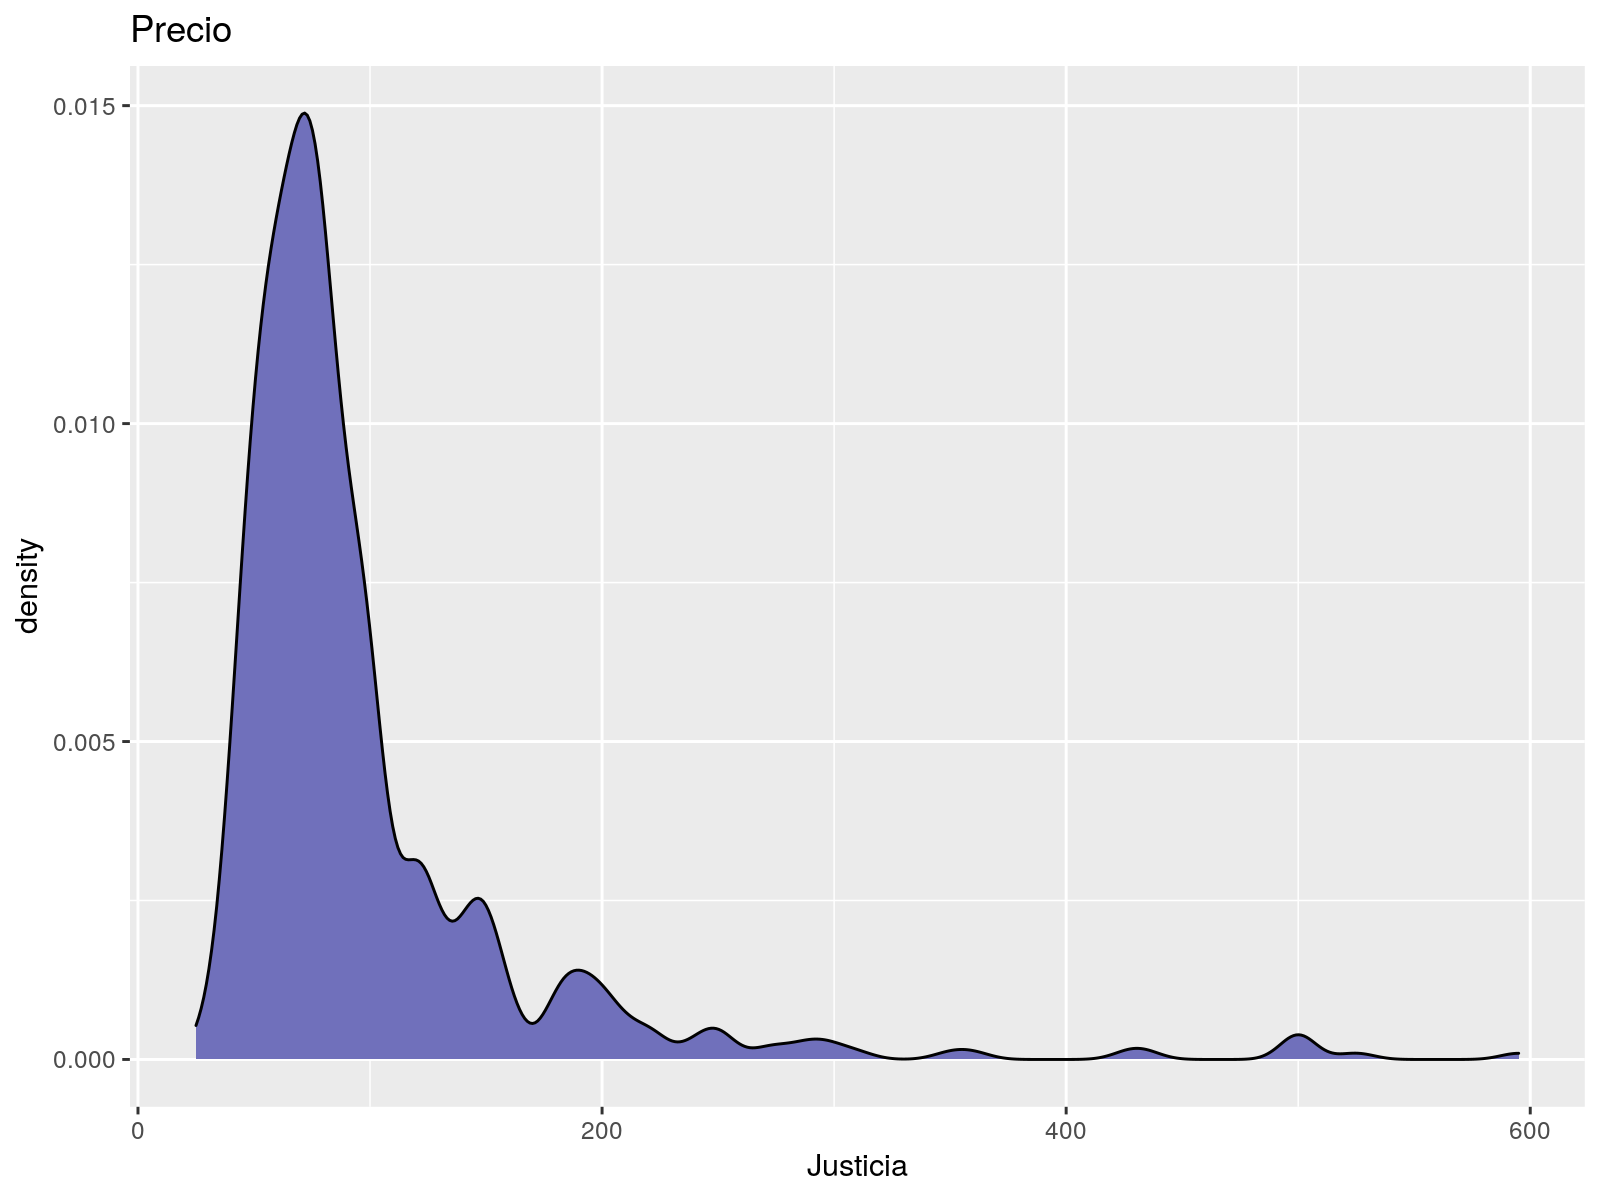

In [137]:
barriosCaros<- unlist(airbnb_entire_PrecioFreq[order(airbnb_entire_PrecioFreq$Precio,decreasing = TRUE),]%>% filter(Freq>100)  %>% head(5)  %>% select(c(Barrio)))

for (b in barriosCaros) {
data <- airbnb_entire[,c("Barrio","Precio")] %>% filter(Barrio ==b & !is.na(Precio)) %>% select(c(Precio))
print(ggplot(data=data, aes(x =Precio))+
   ggtitle("Precio") +geom_density(fill="#7070BB",color="#010101")+xlab(b))

}

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [138]:
# Calculamos la superficie media para los 5 barrios más caros de apartamentos enteros con más de 100 entradas
tamanoMedioBarrio <- aggregate(MetrosCuadrados~Barrio,airbnb_entire,mean,na.rm=TRUE)
airbnb_entire_PrecioFreqTamano <- merge(airbnb_entire_PrecioFreq,tamanoMedioBarrio,by = 'Barrio', all.x=TRUE) 
airbnb_entire_PrecioFreqTamano[order(airbnb_entire_PrecioFreqTamano$Precio,decreasing = TRUE),]%>% filter(Freq>100)  %>% head(5)

Barrio    Precio    Freq MetrosCuadrados
1 Recoletos 161.92537 135  26.66316       
2 Goya      111.33803 142  51.68504       
3 Sol       100.75036 701  45.61692       
4 Trafalgar  98.57848 223  29.30426       
5 Justicia   98.25468 534  28.52669

Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

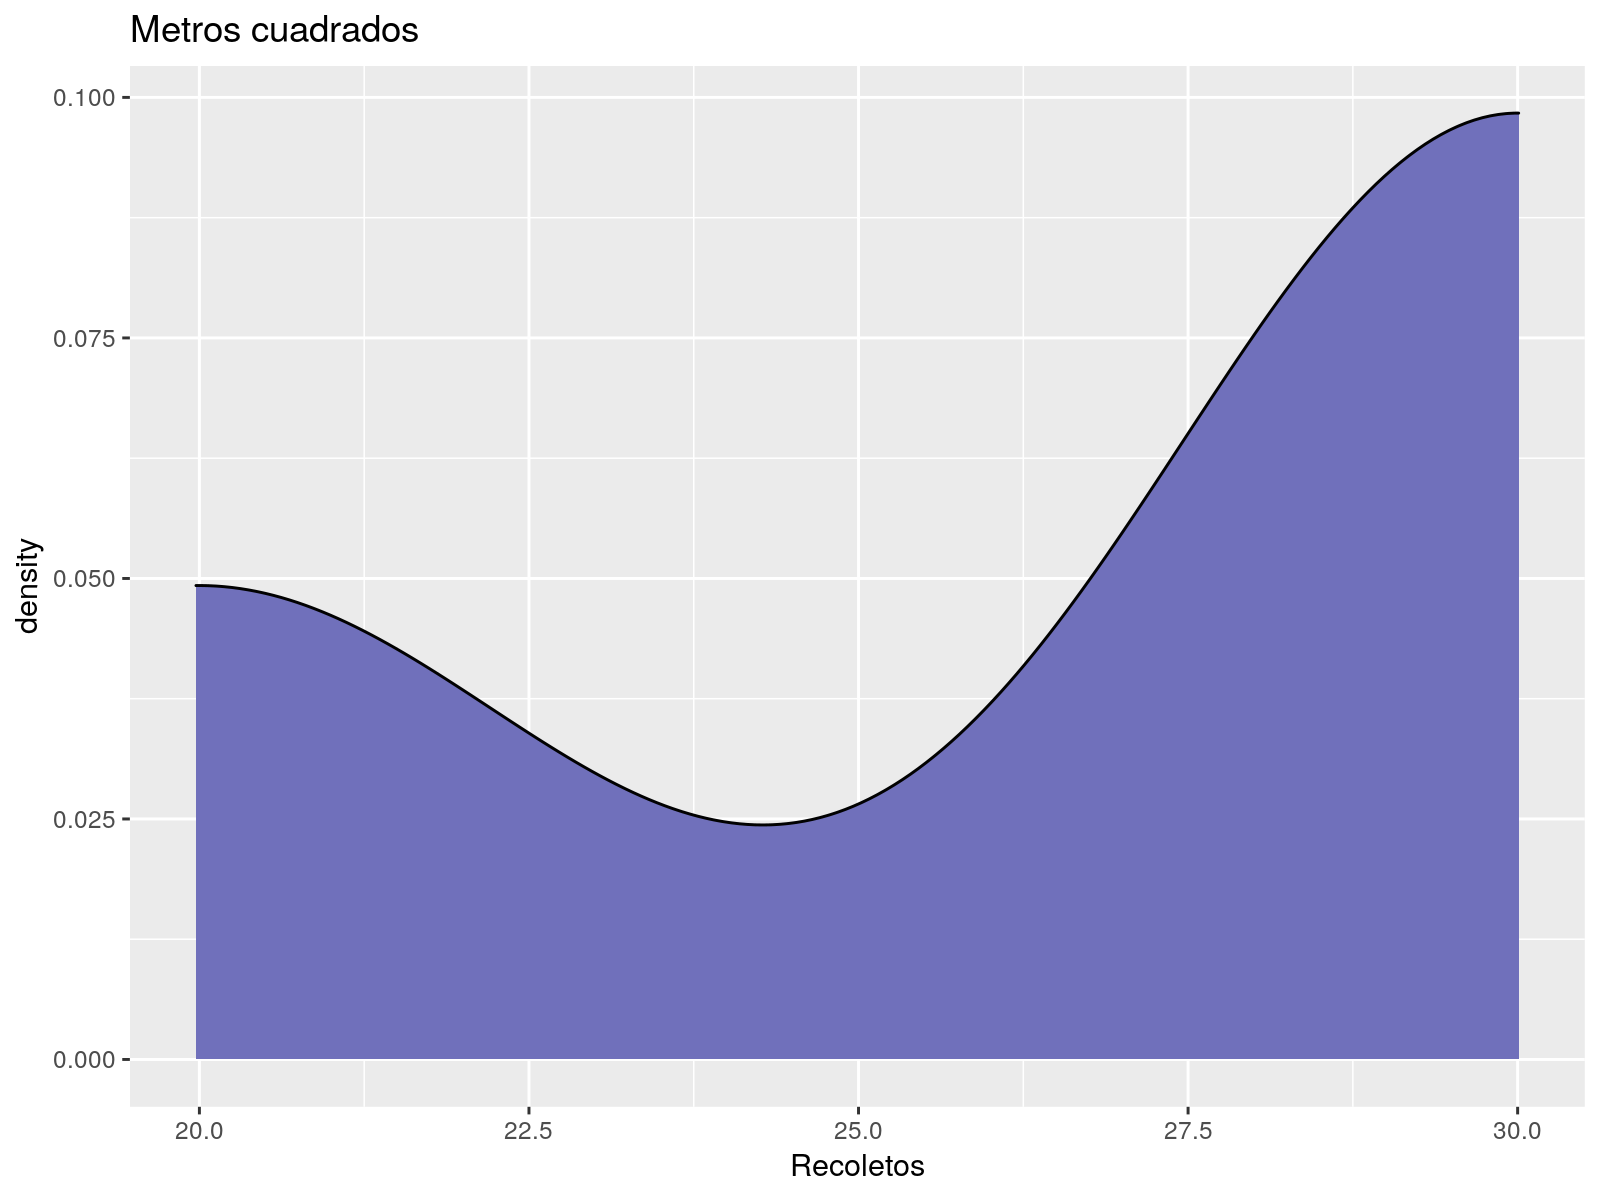

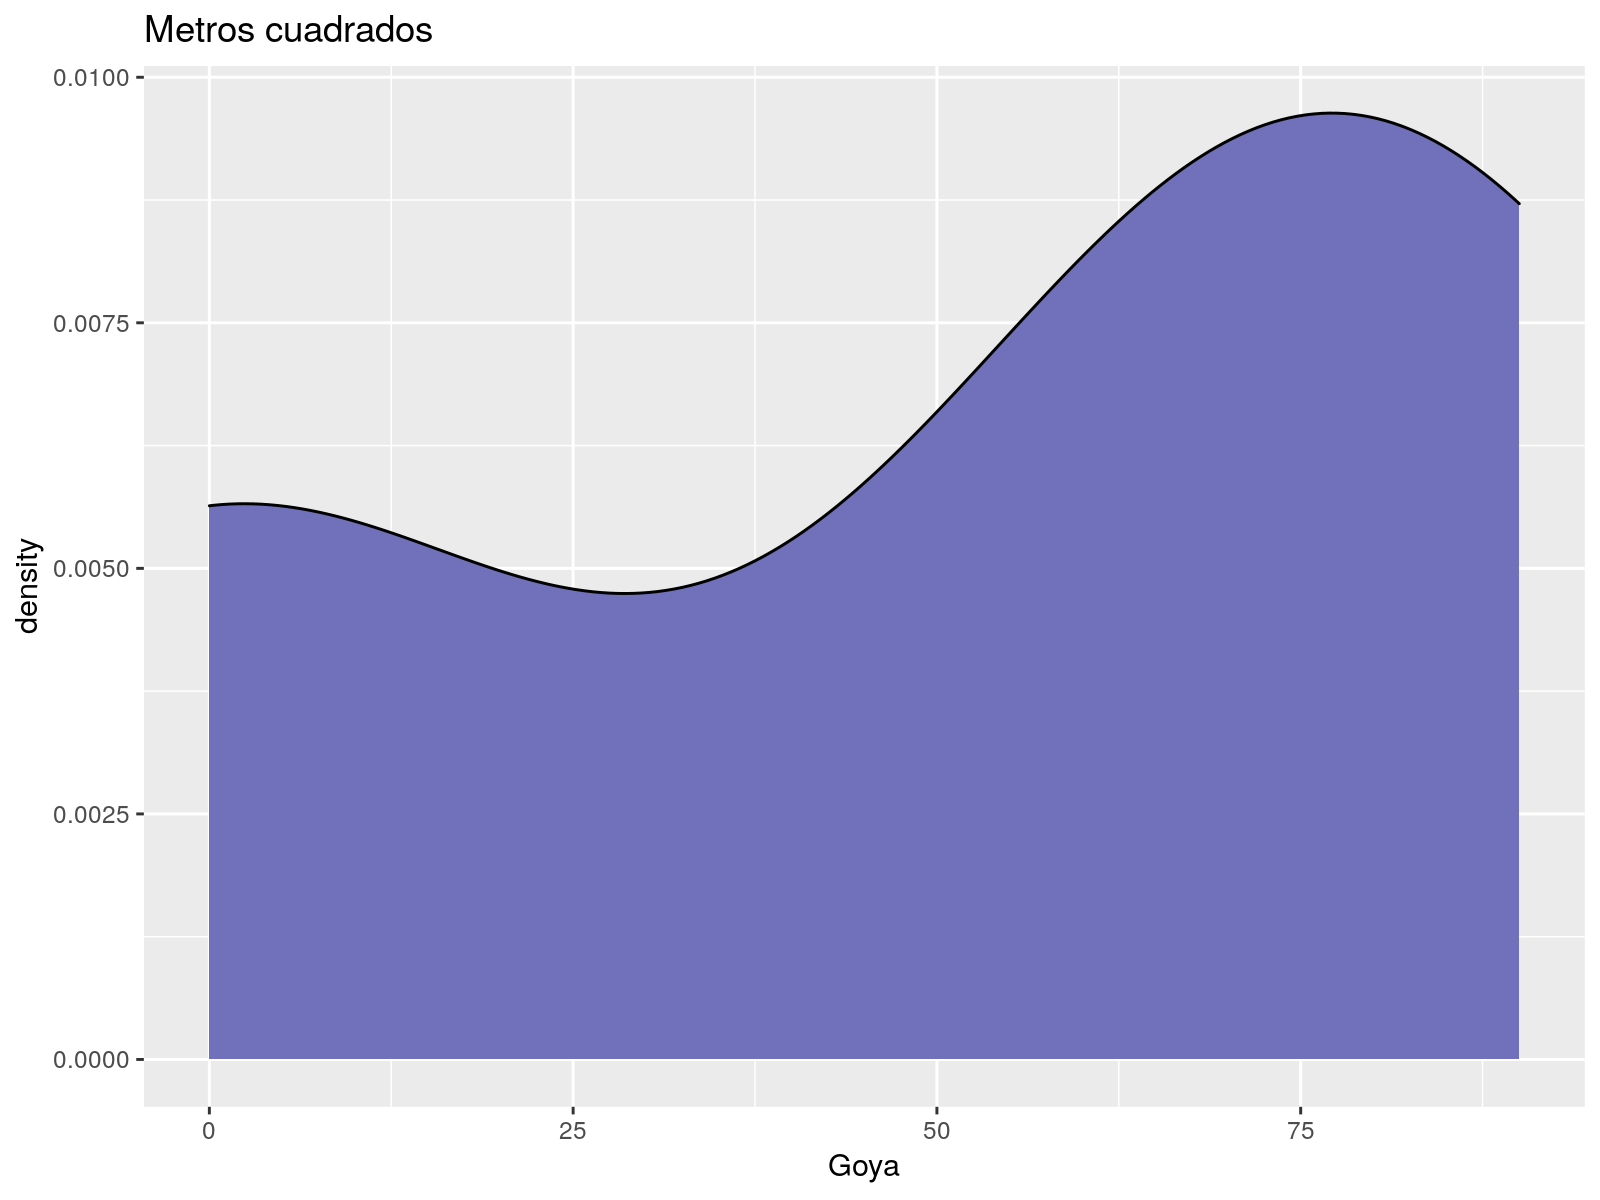

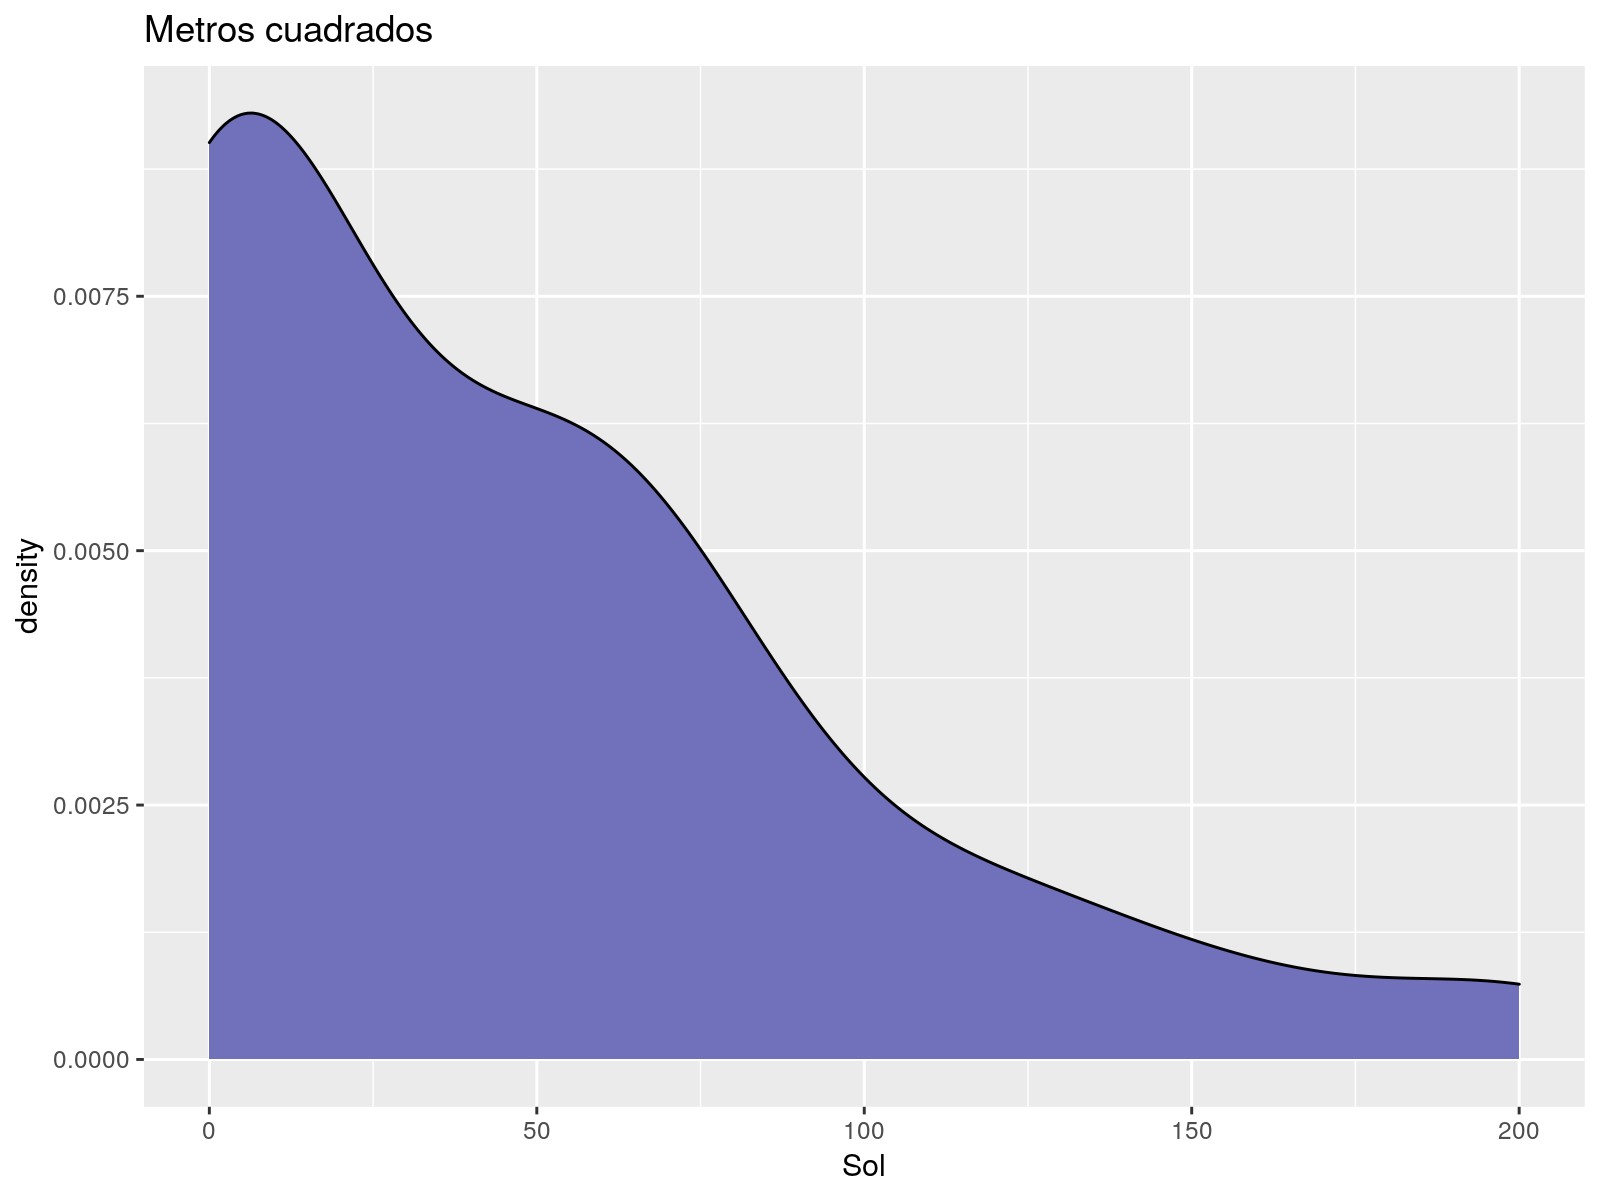

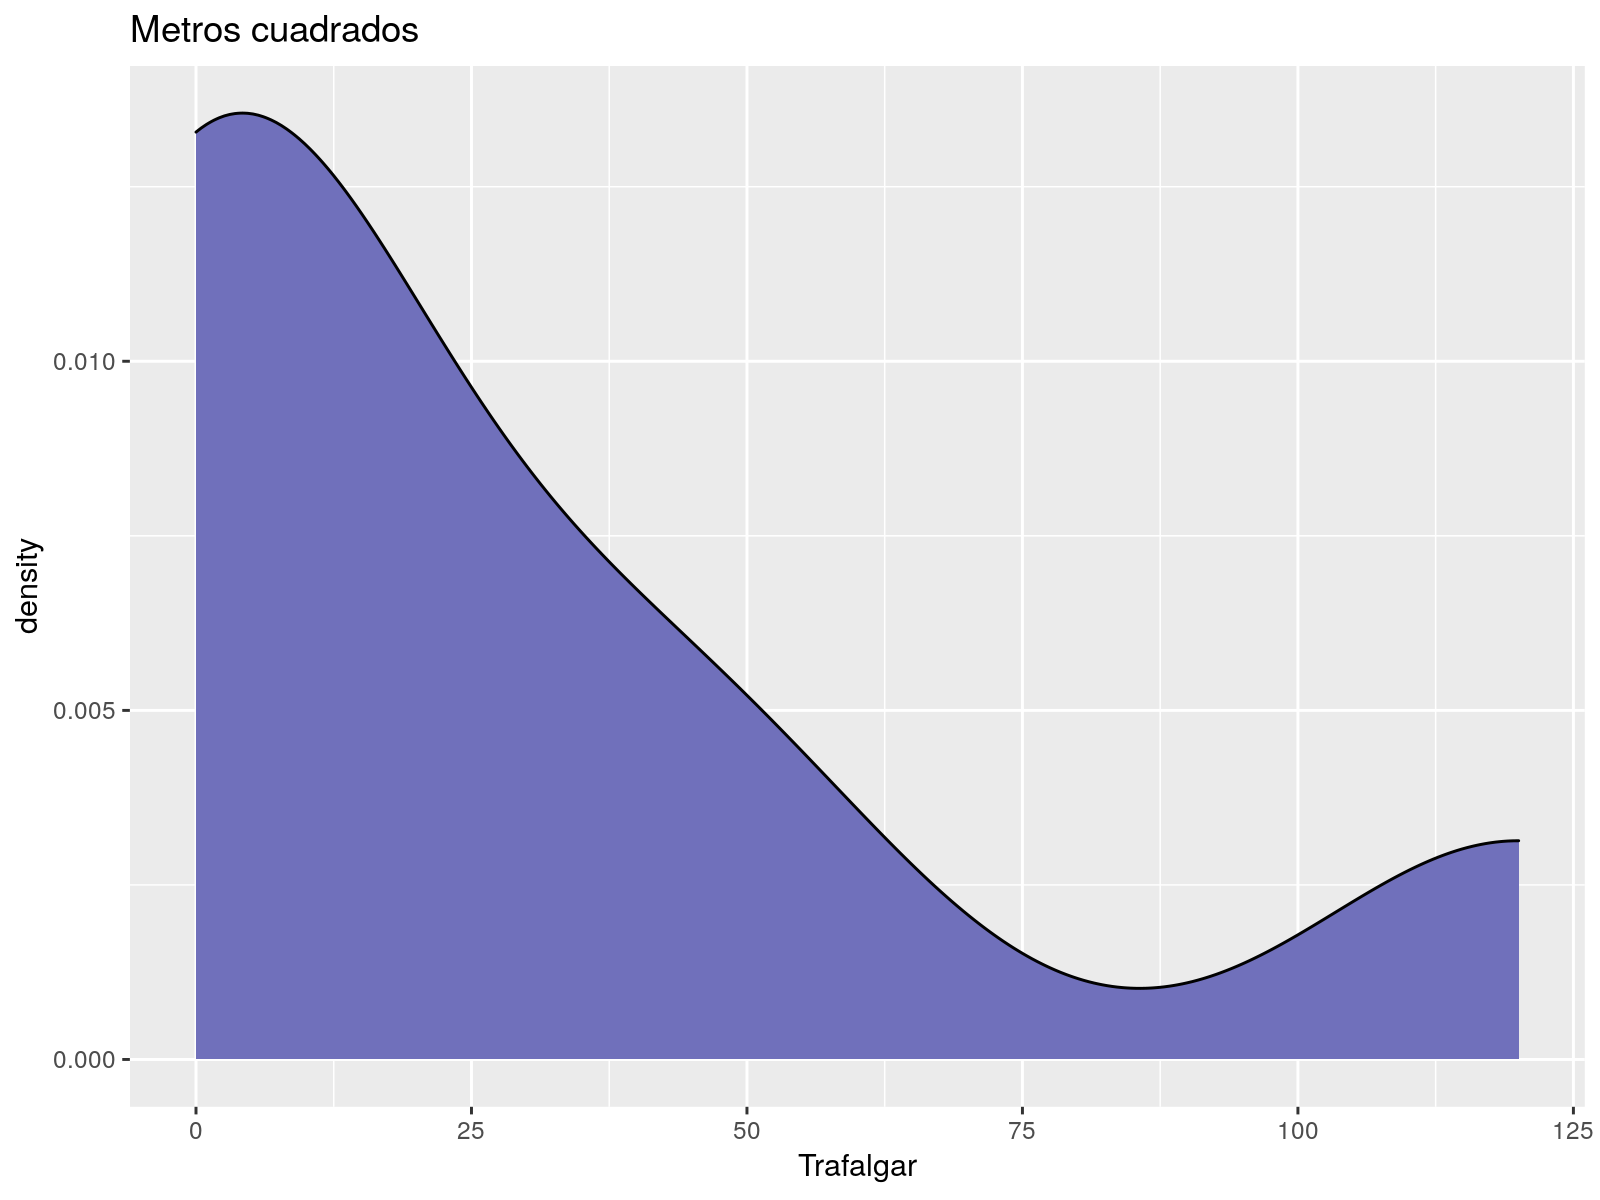

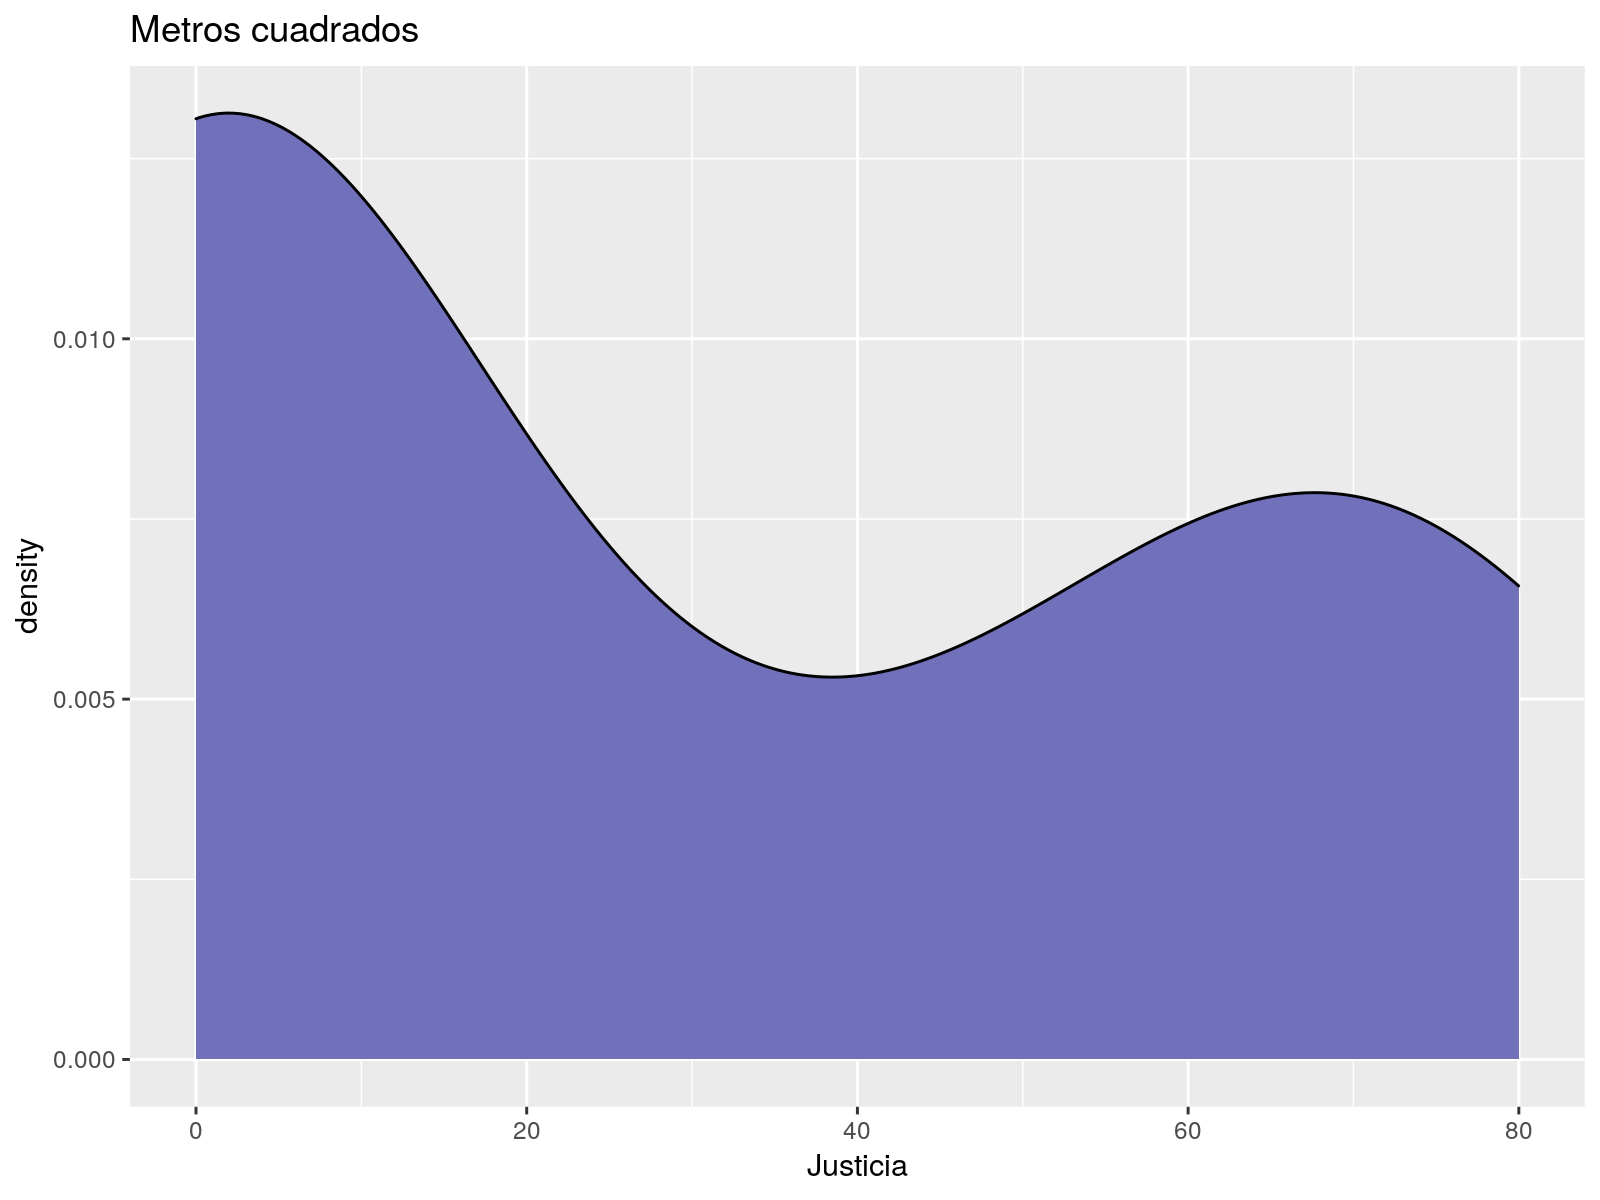

In [139]:


for (b in barriosCaros) {
data <- airbnb_entire[,c("Barrio","MetrosCuadrados")] %>% filter(Barrio ==b & !is.na(MetrosCuadrados)) %>% select(c(MetrosCuadrados))
print(ggplot(data=data, aes(x =MetrosCuadrados))+
   ggtitle("Metros cuadrados") +geom_density(fill="#7070BB",color="#010101")+xlab(b))

}

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [140]:
# En primer lugar para saber el tipo de test a realizar debemos comprobar si la distribución para cada tipo
# de alquiler sigue una distribución normal.
# El test a realizar podría ser un test de shafiro
dfBarriosCaros  <-filter(airbnb_entire,(Barrio=="Recoletos"| Barrio=="Goya" | Barrio=="Justicia"| Barrio=="Trafalgar" | Barrio=="Sol") & !is.na(MetrosCuadrados)) %>% select(c(Barrio,MetrosCuadrados))

for (v in barriosCaros){
    print(paste("Tipo:",v,"pvalue,",
                shapiro.test(dfBarriosCaros$MetrosCuadrados[dfBarriosCaros$Barrio==v])$p.value))
}

print("Vemos que los p-value son Si el p-valor es muy bajos excepto para el barrio de Goya, que sería el único caso que no rechazamos la hipotesis nula de normalidad")

[1] "Tipo: Recoletos pvalue, 0"
[1] "Tipo: Goya pvalue, 0.519924091564745"
[1] "Tipo: Sol pvalue, 8.6913775134728e-07"
[1] "Tipo: Trafalgar pvalue, 0.0127581397426826"
[1] "Tipo: Justicia pvalue, 0.00064192630271212"
[1] "Vemos que los p-value son Si el p-valor es muy bajos excepto para el barrio de Goya, que sería el único caso que no rechazamos la hipotesis nula de normalidad"


In [141]:
# No vamos a realizar un análisis anova ya que solo uno de los barrios parece que la distribución de los metros
# cuadrados sigue una distribución normal

# Realizamos El test de Kruskal-Wallis 

kruskal.test( MetrosCuadrados ~ Barrio, data=dfBarriosCaros)
print("El p-value es alto, por lo que aceptamos la hipotesis nula, y por tanto no hay diferencias significativas en las medias de los grupos")



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


[1] "El p-value es alto, por lo que aceptamos la hipotesis nula, y por tanto no hay diferencias significativas en las medias de los grupos"


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [142]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
barrio_sol
# Hacemos una primera prueba con todas las variables propuestas
mod1 <- lm(Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados, data = barrio_sol )
summary (mod1)
# En el modelo se observa que no todas las variables son significativas y que el R2 no es muy elevado

CodigoPostal Barrio TipoPropiedad TipoAlquiler    MaxOcupantes NumBanyos
15    28013        Sol    Apartment     Entire home/apt  4           1        
16    28013        Sol    Condominium   Entire home/apt  6           1        
17    28013        Sol    Apartment     Entire home/apt  4           1        
18    28012        Sol    Apartment     Entire home/apt  6           1        
19    28013        Sol    Apartment     Entire home/apt  4           1        
21    28013        Sol    Apartment     Entire home/apt  4           1        
22    28005        Sol    Apartment     Entire home/apt 10           2        
23    28013        Sol    Apartment     Entire home/apt  6           1        
24    28012        Sol    Apartment     Entire home/apt  4           1        
25    28012        Sol    Apartment     Entire home/apt  4           1        
26    28013        Sol    Apartment     Entire home/apt  4           1        
27    28014        Sol    Condominium   Entire home/apt  8           2        
28    28013        Sol    Apartment     Entire home/apt  6           2        
30    28005        Sol    Apartment     Entire home/apt  8           1        
43    28013        Sol    Apartment     Entire home/apt  4           1        
44    28013        Sol    Apartment     Entire home/apt  6           2        
45    28013        Sol    Apartment     Entire home/apt  3           1        
46    28013        Sol    Apartment     Entire home/apt  2           1        
47    28013        Sol    Apartment     Entire home/apt  3           1        
48    28012        Sol    Apartment     Entire home/apt  3           1        
49    28013        Sol    Apartment     Entire home/apt  4           1        
50    28012        Sol    Apartment     Entire home/apt  4           2        
52    28013        Sol    Condominium   Entire home/apt  4           1        
53    28013        Sol    Apartment     Entire home/apt  4           1        
55    28013        Sol    Apartment     Entire home/apt  4           1        
57    28012        Sol    Apartment     Entire home/apt  4           1        
569   28012        Sol    Apartment     Entire home/apt 16           4        
570   28012        Sol    Apartment     Entire home/apt  5           2        
571   28012        Sol    Apartment     Entire home/apt  8           1        
572   28012        Sol    Apartment     Entire home/apt  4           1        
⋮     ⋮            ⋮      ⋮             ⋮               ⋮            ⋮        
12755 28012        Sol    Apartment     Entire home/apt  4           1.0      
12756 28013        Sol    Loft          Entire home/apt  6           1.5      
12757 28013        Sol    Apartment     Entire home/apt  4           1.0      
12908 28013        Sol    Apartment     Entire home/apt  6           2.0      
12909 28005        Sol    Apartment     Entire home/apt  6           1.0      
12910 28013        Sol    Apartment     Entire home/apt  6           1.0      
12911 28013        Sol    Apartment     Entire home/apt  3           1.0      
12912 28013        Sol    Apartment     Entire home/apt 10           3.0      
12913 28013        Sol    Apartment     Entire home/apt  4           1.0      
12914 28013        Sol    Apartment     Entire home/apt  4           1.0      
12915 28013        Sol    Apartment     Entire home/apt  4           1.0      
12917 28013        Sol    Apartment     Entire home/apt  4           1.0      
12918 28012        Sol    Apartment     Entire home/apt  4           1.0      
12919 28004        Sol    Apartment     Entire home/apt  4           1.0      
12921 28013        Sol    Apartment     Entire home/apt  2           1.0      
12922 28012        Sol    Apartment     Entire home/apt  6           1.0      
12923 28012        Sol    Loft          Entire home/apt  4           1.0      
12924 28013        Sol    Apartment     Entire home/apt  4           1.0      
12925 28013        Sol    Apartment     Entire home/apt 


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.852 -15.599  -4.021  10.042 108.406 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     42.28673   10.25650   4.123 0.000127 ***
NumBanyos       15.70888   10.15721   1.547 0.127701    
NumDormitorios  22.75344    6.55828   3.469 0.001022 ** 
MaxOcupantes    -2.85045    2.60279  -1.095 0.278223    
MetrosCuadrados  0.29900    0.09997   2.991 0.004155 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.42 on 55 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.6108,	Adjusted R-squared:  0.5825 
F-statistic: 21.58 on 4 and 55 DF,  p-value: 9.534e-11


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [143]:
# Matriz de correlación
cor(barrio_sol[,c('Precio', 'NumBanyos', 'NumDormitorios', 'MaxOcupantes', 'MetrosCuadrados')],use="pairwise.complete.obs")

Precio    NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
Precio          1.0000000 0.6474419 0.6542553      0.6578409    0.6381754      
NumBanyos       0.6474419 1.0000000 0.6761906      0.6578162    0.4820549      
NumDormitorios  0.6542553 0.6761906 1.0000000      0.7594598    0.5684521      
MaxOcupantes    0.6578409 0.6578162 0.7594598      1.0000000    0.4286233      
MetrosCuadrados 0.6381754 0.4820549 0.5684521      0.4286233    1.0000000

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 643 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


[1] "Vemos que hay pisos con supercie de 0 metros cuadrados o cercana a cero. Esos datos no tienen sentido"


Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


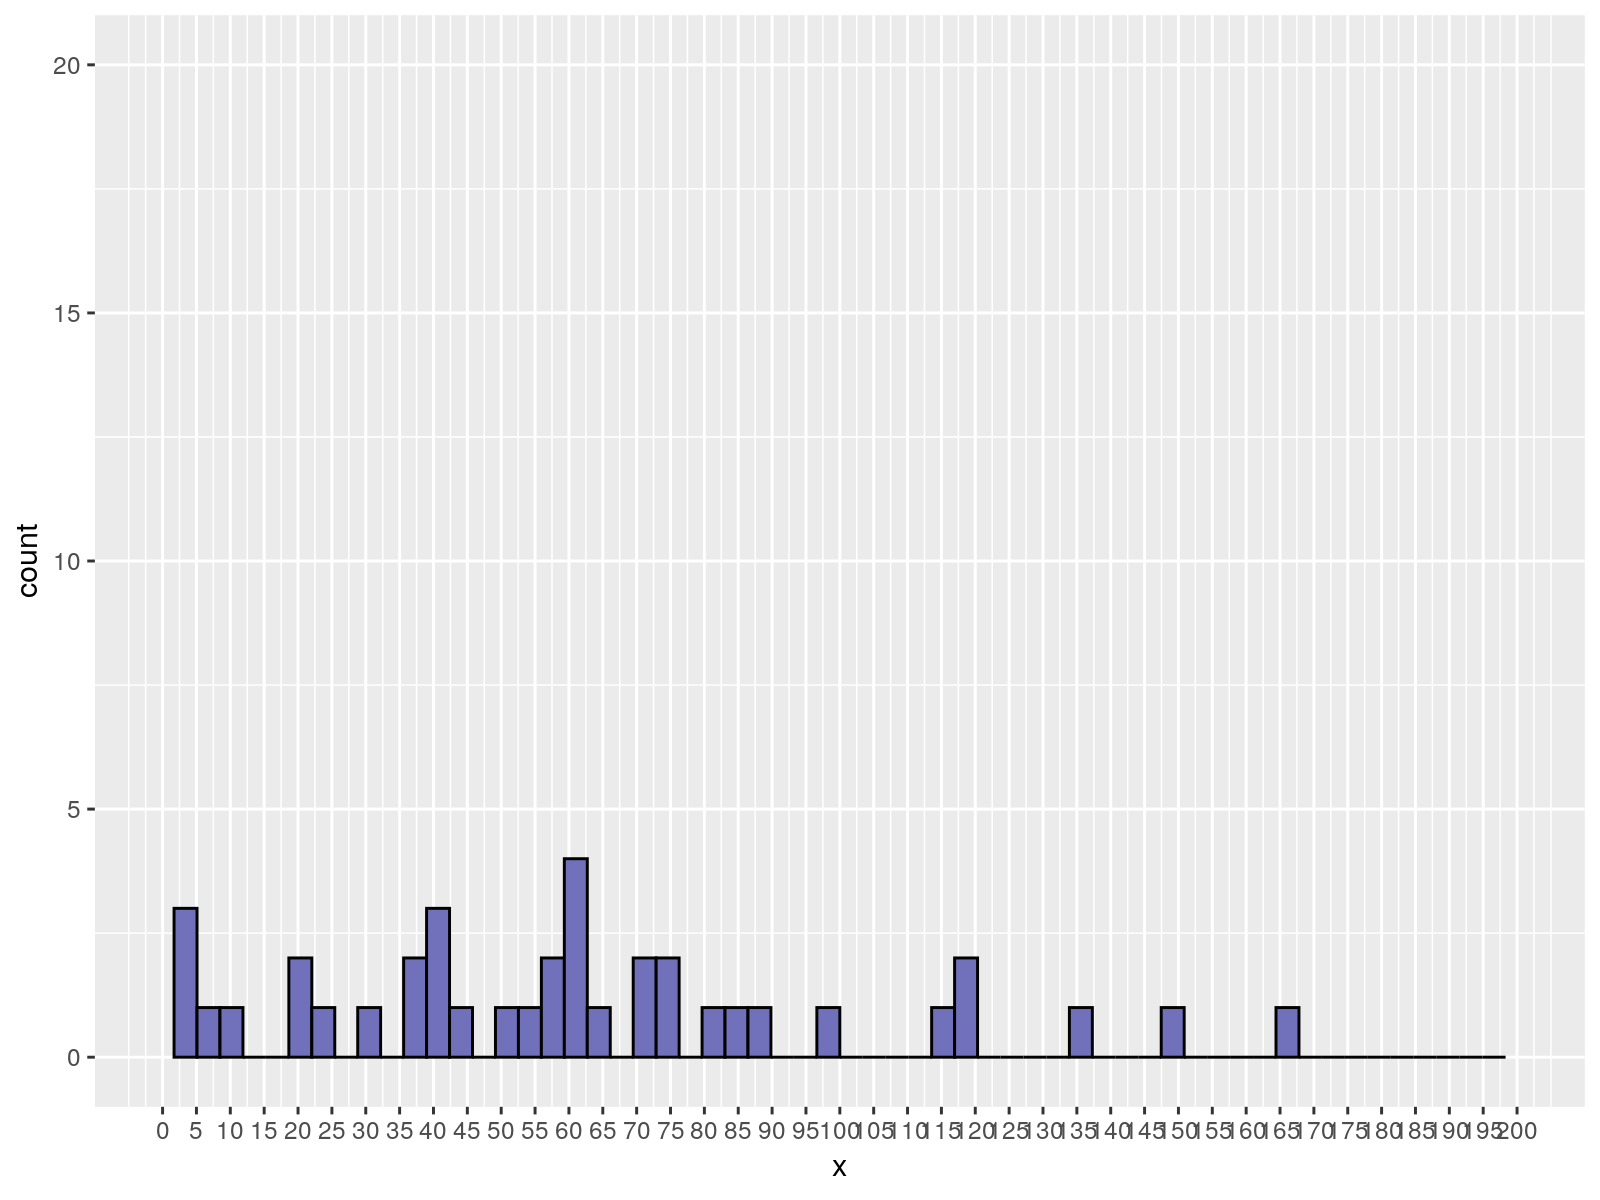

[1] "Se observan número no enteros en el número de baños, y esto no tiene sentido"


Warning message:
“Removed 2 rows containing missing values (geom_bar).”


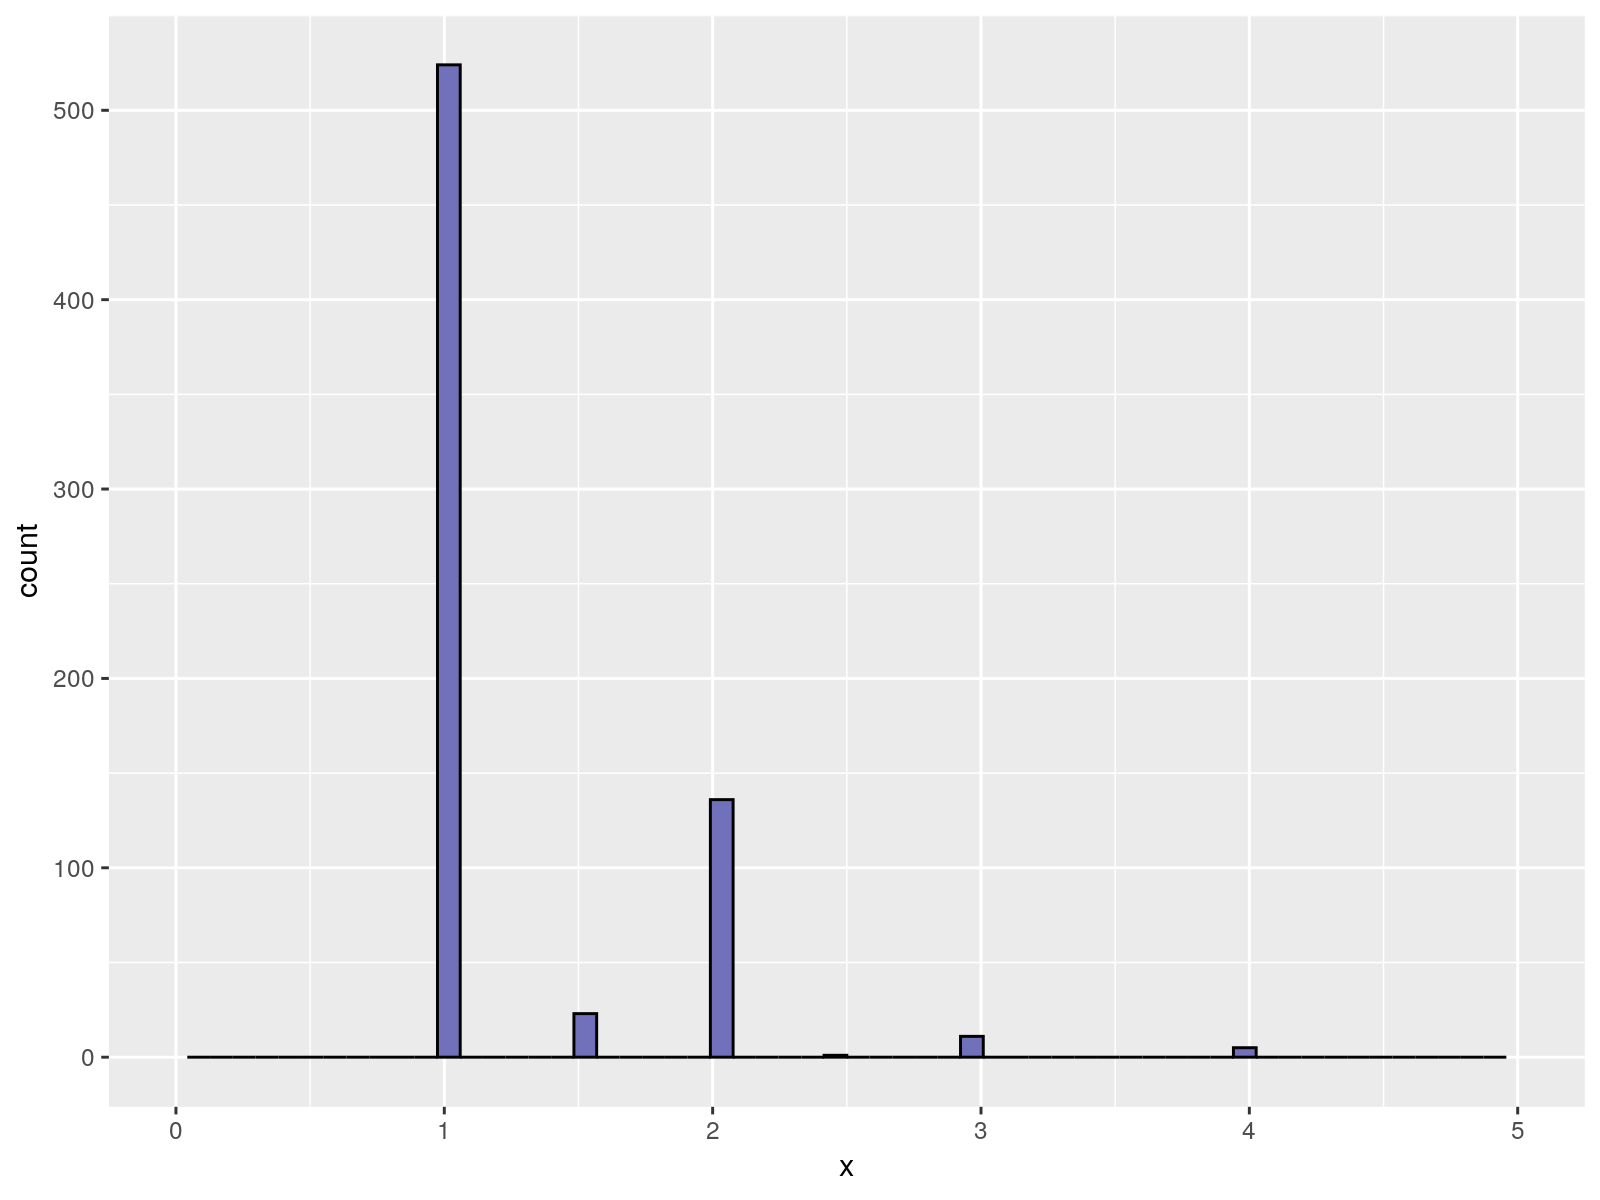

[1] "No se observa nada raro en principio"


Warning message:
“Removed 2 rows containing missing values (geom_bar).”


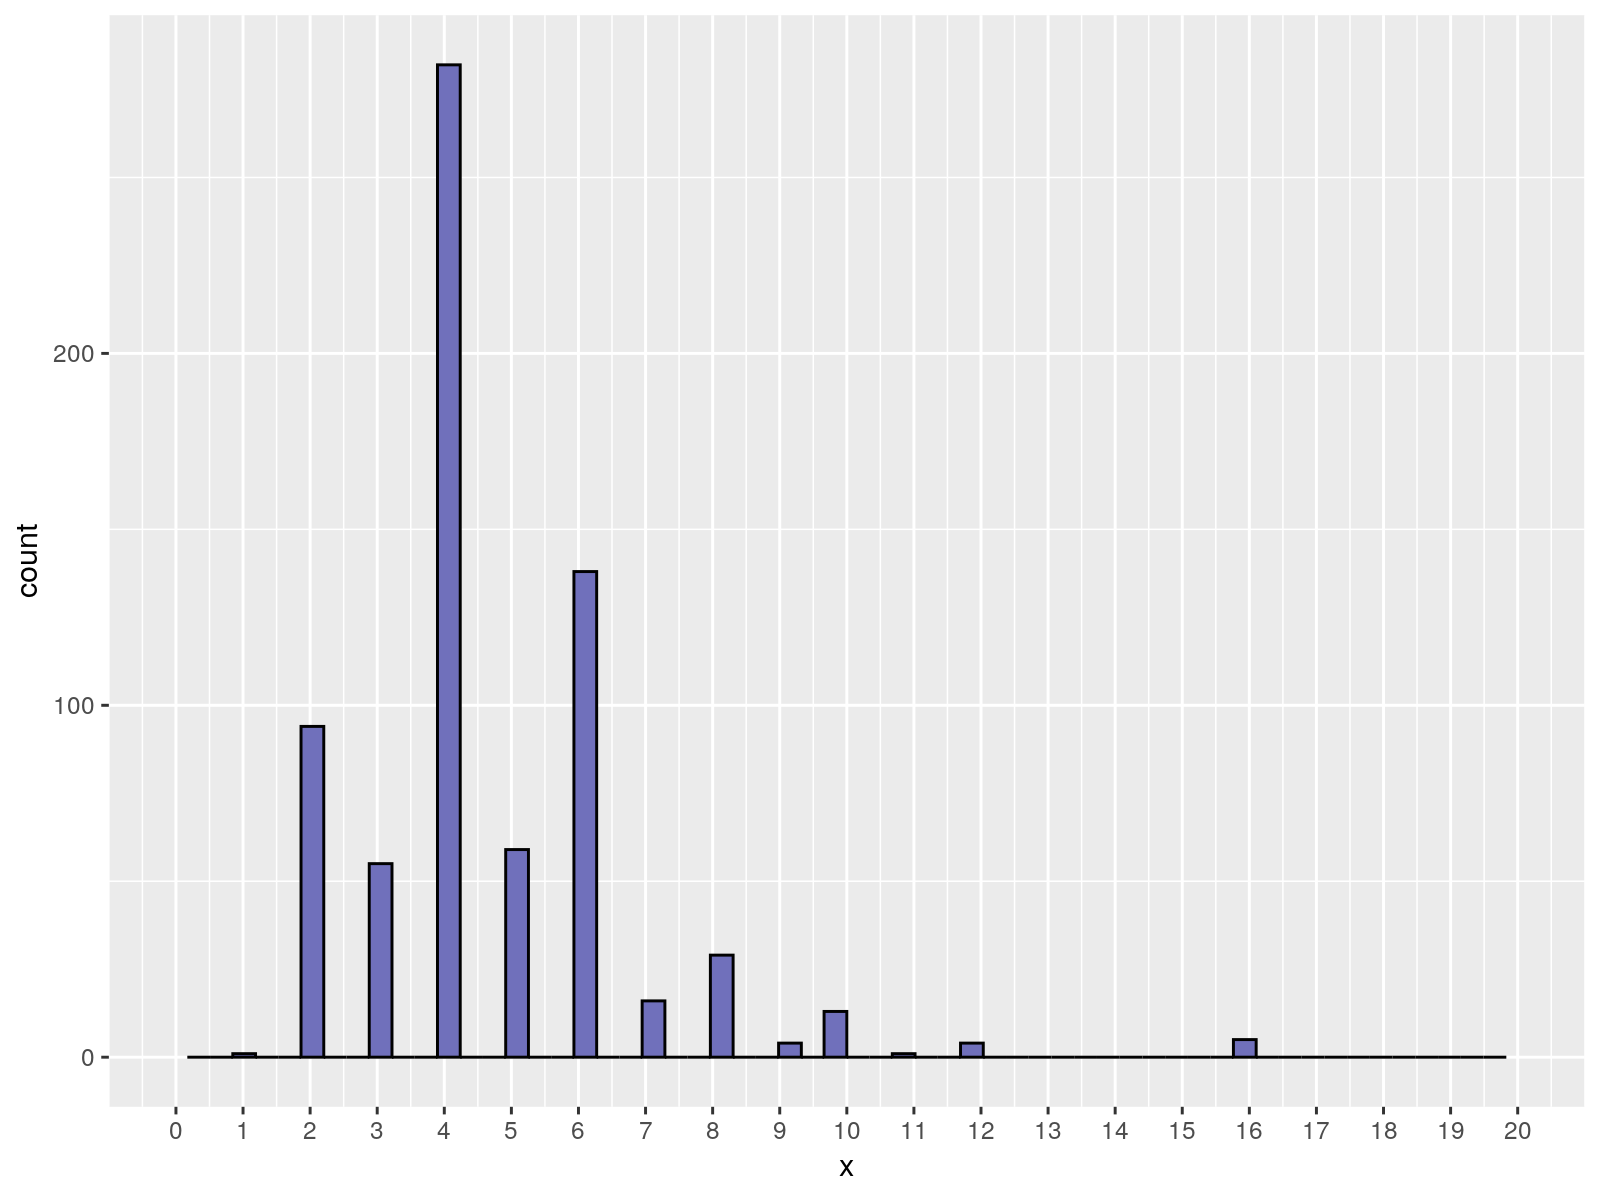

[1] "No se observa nada raro en principio"


Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


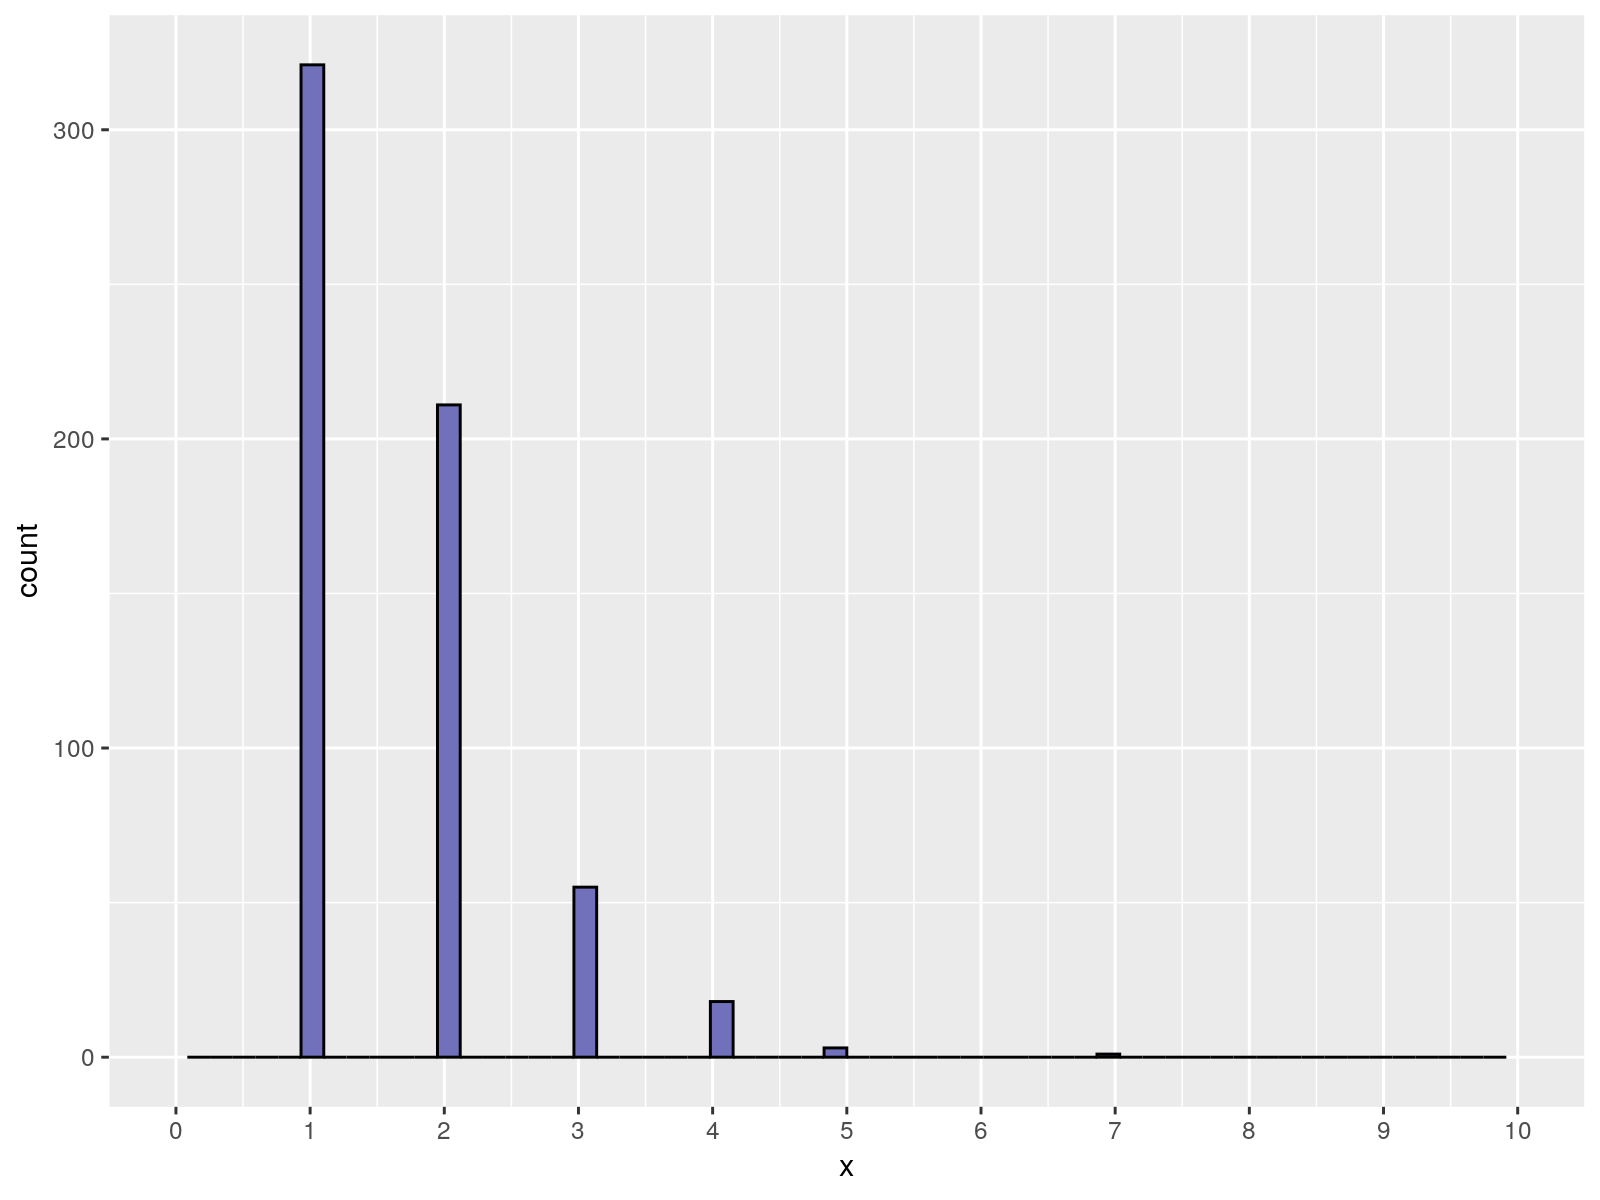

[1] "No se observa nada raro"


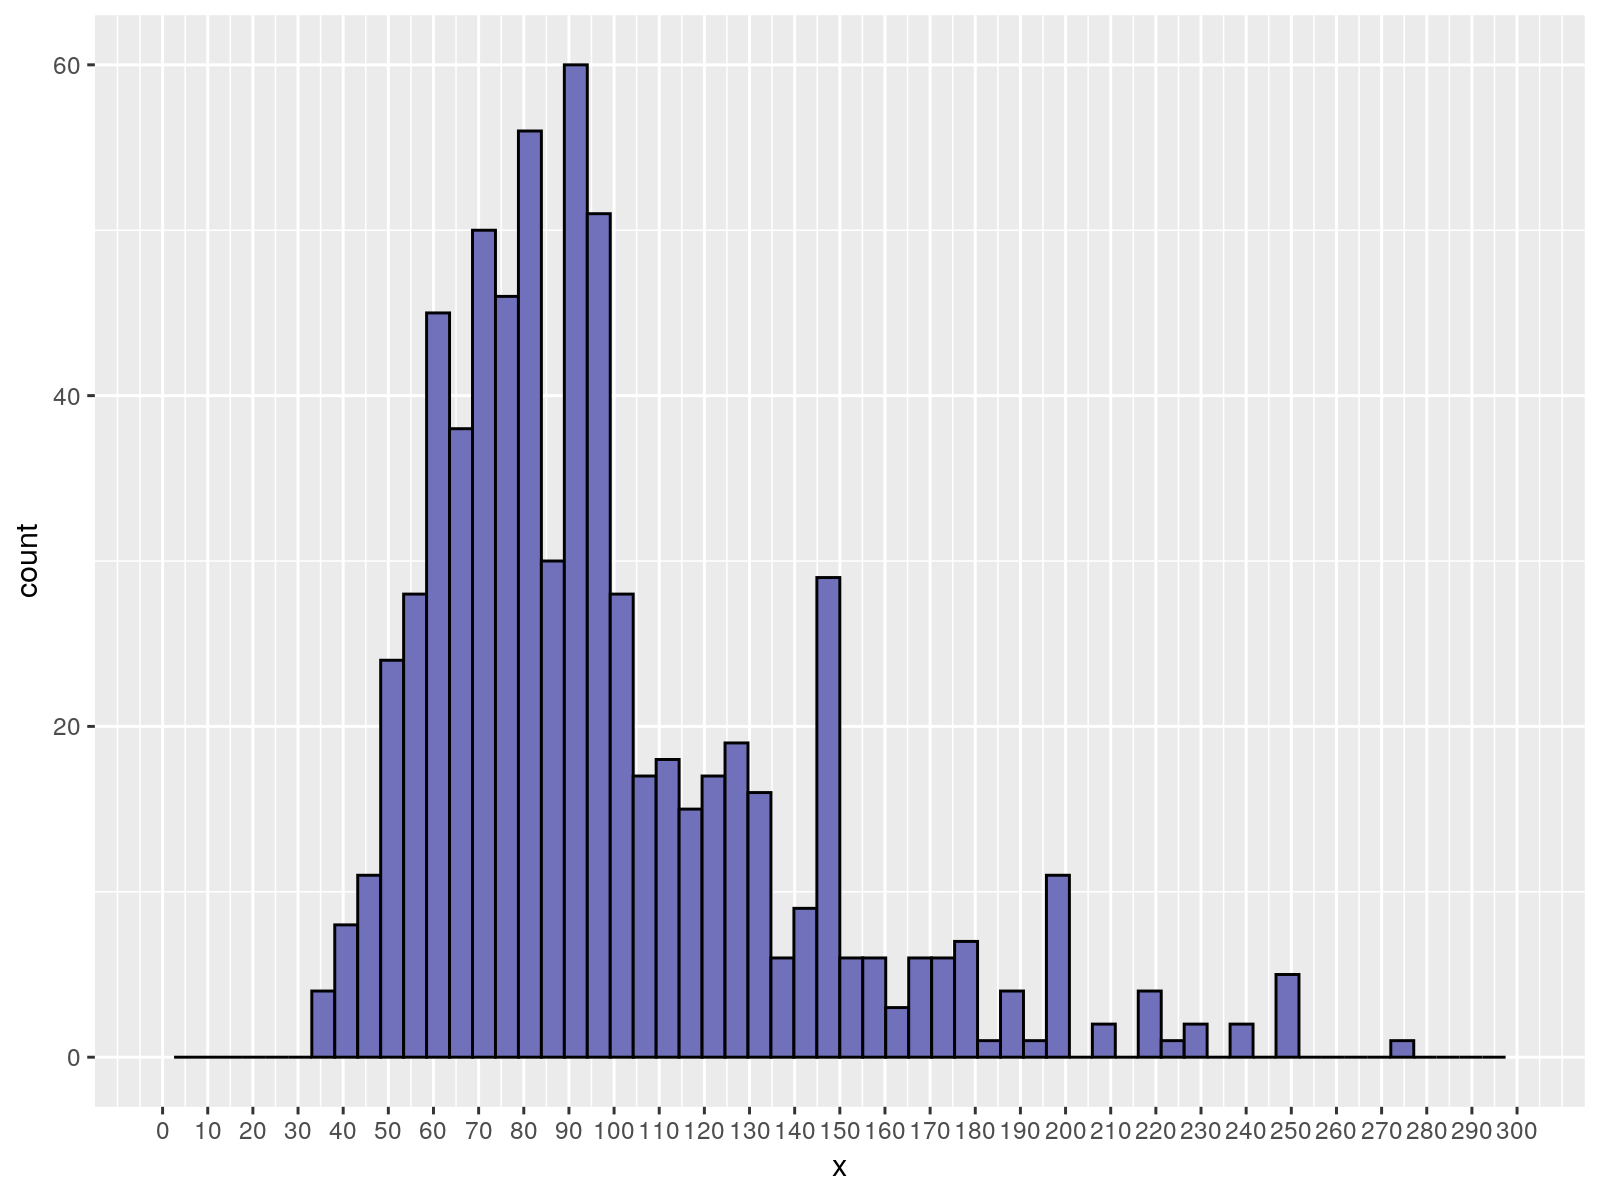

In [144]:
ggplot(data.frame(x=barrio_sol$MetrosCuadrados), aes(x))+
geom_histogram(bins=60,fill="#7070BB",color="#010101") +  scale_x_continuous(breaks = seq(0,200,5), lim=c(0,200))
print('Vemos que hay pisos con supercie de 0 metros cuadrados o cercana a cero. Esos datos no tienen sentido')

ggplot(data.frame(x=barrio_sol$NumBanyos), aes(x))+
geom_histogram(bins=60,fill="#7070BB",color="#010101") +  scale_x_continuous(breaks = seq(0,5,1), lim=c(0,5))
print('Se observan número no enteros en el número de baños, y esto no tiene sentido')


ggplot(data.frame(x=barrio_sol$MaxOcupantes), aes(x))+
geom_histogram(bins=60,fill="#7070BB",color="#010101") +  scale_x_continuous(breaks = seq(0,20,1), lim=c(0,20))
print('No se observa nada raro en principio')

ggplot(data.frame(x=barrio_sol$NumDormitorios), aes(x))+
geom_histogram(bins=60,fill="#7070BB",color="#010101") +  scale_x_continuous(breaks = seq(0,10,1), lim=c(0,10))
print('No se observa nada raro en principio')

ggplot(data.frame(x=barrio_sol$Precio), aes(x))+
geom_histogram(bins=60,fill="#7070BB",color="#010101") +  scale_x_continuous(breaks = seq(0,300,10), lim=c(0,300))
print('No se observa nada raro')


In [145]:
print('Si la superficie es inferior a 25 metros cuadrados ponemos NA')
print('Si el número de baños es un numero decimal( 1.5 o 2.5) ponemos NA')
barrio_sol$MetrosCuadrados[barrio_sol$MetrosCuadrados <25] = NA
barrio_sol$NumBanyos[barrio_sol$NumBanyos==1.5 | barrio_sol$NumBanyos==2.5] = NA
# Calculamos de nuevo la matriz de correlación 
cor(barrio_sol[,c('Precio', 'NumBanyos', 'NumDormitorios', 'MaxOcupantes', 'MetrosCuadrados')],use="pairwise.complete.obs")
print('Ahora la correlación entre número de habitaciones y metros cuadrados es alta')

[1] "Si la superficie es inferior a 25 metros cuadrados ponemos NA"
[1] "Si el número de baños es un numero decimal( 1.5 o 2.5) ponemos NA"


Precio    NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
Precio          1.0000000 0.6516805 0.6542553      0.6578409    0.7562177      
NumBanyos       0.6516805 1.0000000 0.6811916      0.6657172    0.5993495      
NumDormitorios  0.6542553 0.6811916 1.0000000      0.7594598    0.8320954      
MaxOcupantes    0.6578409 0.6657172 0.7594598      1.0000000    0.6755066      
MetrosCuadrados 0.7562177 0.5993495 0.8320954      0.6755066    1.0000000

[1] "Ahora la correlación entre número de habitaciones y metros cuadrados es alta"


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [146]:
print('El modelo con un R2 ajustado más elevado encontrado es aquél que incluye las variables número de dormitorios y metros cuadrados')
print('Sin embargo, la variable metros cuadrados no es significativa, es posible que se deba a que guarda mucha correlación con Numero de dormitorios, colinealidad')
# El modelo que mejor se ajusta con R2 ajustado  es el siguiente,incluyendo además la variable puntuación
# además eliminado el intercepto el modelo mejora.

mod1 <- lm(Precio ~  NumDormitorios + MetrosCuadrados , data = barrio_sol)
summary(mod1) 


[1] "El modelo con un R2 ajustado más elevado encontrado es aquél que incluye las variables número de dormitorios y metros cuadrados"
[1] "Sin embargo, la variable metros cuadrados no es significativa, es posible que se deba a que guarda mucha correlación con Numero de dormitorios, colinealidad"



Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Residuals:
   Min     1Q Median     3Q    Max 
-87.11 -17.24  -2.55  20.46  66.59 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      38.5659    11.9692   3.222  0.00314 ** 
NumDormitorios   33.5454     7.6545   4.382  0.00014 ***
MetrosCuadrados   0.1807     0.2248   0.804  0.42799    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.9 on 29 degrees of freedom
  (669 observations deleted due to missingness)
Multiple R-squared:  0.7424,	Adjusted R-squared:  0.7247 
F-statistic:  41.8 on 2 and 29 DF,  p-value: 2.869e-09


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [86]:
print("La variable más fiable para conocer el precio del inmueble es el número de habitaciones")

[1] "La variable más fiable para conocer el precio del inmueble es el número de habitación"


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [147]:
# Debido a la colinealidad para ver cuanto influye la variable metros cuadrados en el precio, eliminamos el número de habitaciones

#print("Si decimos incluir la variable metros cuadrados aunque no sea significativa")
mod2 <- lm(Precio ~  MetrosCuadrados , data = barrio_sol )
summary(mod2)
paste("El coeficiente de dicha variable es " ,round(summary(mod2)$coefficients[2,1],2), "por lo que por cada metro adicional se incrementa en ",round(summary(mod2)$coefficients[2,1],2) ,"euro el precio del apartamento")
paste("El intervalor de confianza del 95% es: [" , paste(confint(mod2,level = 0.95)[2,],collapse=" ,"),"]")


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.547 -23.537  -0.514  10.746 121.394 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      28.4792    14.8893   1.913   0.0654 .  
MetrosCuadrados   1.0006     0.1581   6.330 5.56e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.44 on 30 degrees of freedom
  (669 observations deleted due to missingness)
Multiple R-squared:  0.5719,	Adjusted R-squared:  0.5576 
F-statistic: 40.07 on 1 and 30 DF,  p-value: 5.561e-07


[1] "El coeficiente de dicha variable es  1 por lo que por cada metro adicional se incrementa en  1 euro el precio del apartamento"

[1] "El intervalor de confianza del 95% es: [ 0.677773941414577 ,1.32340060295398 ]"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [105]:
mod3 <- lm(Precio ~  NumDormitorios , data = barrio_sol )
summary(mod3)
paste("El coeficiente de dicha variable es " ,round(summary(mod3)$coefficients[2,1],2), "por lo que por cada habitación adicional se incrementa en ",round(summary(mod3)$coefficients[2,1],2) ,"euros el precio del apartamento")
paste("El intervalor de confianza del 95% es: [" , paste(confint(mod3,level = 0.95)[2,],collapse=" ,"),"]")


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
     Min       1Q   Median       3Q      Max 
-206.225  -22.676   -4.312   16.416  263.960 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      52.584      2.568   20.48   <2e-16 ***
NumDormitorios   33.364      1.459   22.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.9 on 699 degrees of freedom
Multiple R-squared:  0.4281,	Adjusted R-squared:  0.4272 
F-statistic: 523.1 on 1 and 699 DF,  p-value: < 2.2e-16


[1] "El coeficiente de dicha variable es  33.36 por lo que por cada habitación adicional se incrementa en  33.36 euros el precio del apartamento"

[1] "El intervalor de confianza del 95% es: [ 30.5000398658094 ,36.2280331958966 ]"

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [72]:
n = nrow(filter(barrio_sol,!is.na(Barrio)))
ns=nrow(filter(barrio_sol,NumDormitorios == 3))


In [73]:
binom.test(ns,n,conf.level = 0.95)


	Exact binomial test

data:  ns and n
number of successes = 55, number of trials = 701, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.0596506 0.1009033
sample estimates:
probability of success 
            0.07845934 


In [74]:
paste("Probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorio", round(binom.test(ns,n,conf.level = 0.95)$estimate,2))

[1] "Probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorio 0.08"

In [75]:
paste("El intervalo de confianza es [", binom.test(ns,n,conf.level = 0.95)$conf.int[1],",",binom.test(ns,n,conf.level = 0.95)$conf.int[2],"]")

[1] "El intervalo de confianza es [ 0.0596505980500962 , 0.100903307028694 ]"